In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn import tree, preprocessing
from datetime import datetime
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize

In [5]:
cd /Users/deepsha/downloads

/Users/deepsha/Downloads


In [6]:
df = pd.read_csv("df_model.csv", dtype={"COUNTY": "string"})
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE     COUNTY  \
0       2005    Miscellaneous  40.036944 -121.005833    CA     Plumas   
1       2004        Lightning  38.933056 -120.404444    CA     Placer   
2       2004   Debris Burning  38.984167 -120.735556    CA  El Dorado   
3       2004        Lightning  38.559167 -119.913333    CA     Alpine   
4       2004        Lightning  38.559167 -119.933056    CA     Alpine   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2   Wednesday  
1     2004-05-12       0.25               A         0.0      5   Wednesday  
2     2004-05-31       0.10               A         0.0      5      Monday  
3     2004-06-28       0.10               A         5.0      6      Monday  
4     2004-06-28       0.10               A         5.0      6      Monday  


In [28]:
df.shape

(1880465, 10)

In [6]:
df.isna().sum()

FIRE_YEAR           0
STAT_CAUSE_DESCR    0
LATITUDE            0
LONGITUDE           0
STATE               0
COUNTY              0
DISCOVERY_DATE      0
FIRE_SIZE           0
FIRE_SIZE_CLASS     0
Difference          0
MONTH               0
DAY_OF_WEEK         0
dtype: int64

In [7]:
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
df['STATE'] = le.fit_transform(df['STATE'])
df['COUNTY'] = le.fit_transform(df['COUNTY'])
df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])
print(df.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  COUNTY  \
0       2005                 7  40.036944 -121.005833      4    1214   
1       2004                 6  38.933056 -120.404444      4    1211   
2       2004                 3  38.984167 -120.735556      4     499   
3       2004                 6  38.559167 -119.913333      4      28   
4       2004                 6  38.559167 -119.933056      4      28   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH  DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2            6  
1     2004-05-12       0.25               A         0.0      5            6  
2     2004-05-31       0.10               A         0.0      5            1  
3     2004-06-28       0.10               A         5.0      6            1  
4     2004-06-28       0.10               A         5.0      6            1  


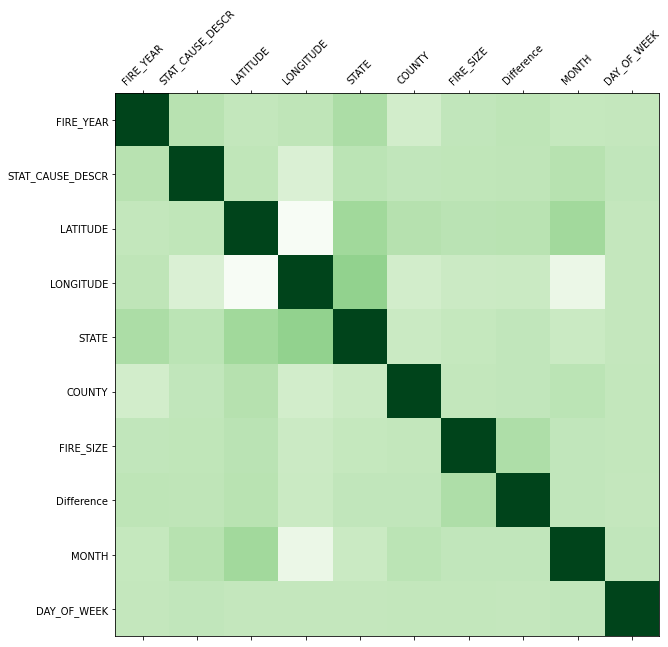

In [15]:
def plot_corr(df,size=10):
    corr = df.corr()  
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Greens)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df)

In [8]:
df = df.drop(['DISCOVERY_DATE','FIRE_SIZE_CLASS'], axis=1)
print(df.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  COUNTY  \
0       2005                 7  40.036944 -121.005833      4    1214   
1       2004                 6  38.933056 -120.404444      4    1211   
2       2004                 3  38.984167 -120.735556      4     499   
3       2004                 6  38.559167 -119.913333      4      28   
4       2004                 6  38.559167 -119.933056      4      28   

   FIRE_SIZE  Difference  MONTH  DAY_OF_WEEK  
0       0.10         0.0      2            6  
1       0.25         0.0      5            6  
2       0.10         0.0      5            1  
3       0.10         5.0      6            1  
4       0.10         5.0      6            1  


### Randon Forest Priliminary

In [8]:
X = df.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = df['STAT_CAUSE_DESCR'].values

In [9]:
len(df['STAT_CAUSE_DESCR'].drop_duplicates())

13

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [20]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5929113340660119


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify =y )

In [23]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5922306519658241


### LGBM - preliminary 

In [29]:
#Scaling using the Standard Scaler
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)

In [31]:
d_train=lgb.Dataset(X_train, label=y_train)

In [61]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=100
params['num_class']=13
params['num_leaves']=50

In [62]:
clf=lgb.train(params,d_train,100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1316325, number of used features: 9
[LightGBM] [Info] Start training from score -1.897950
[LightGBM] [Info] Start training from score -3.206269
[LightGBM] [Info] Start training from score -3.423098
[LightGBM] [Info] Start training from score -1.479053
[LightGBM] [Info] Start training from score -2.545126
[LightGBM] [Info] Start training from score -5.092589
[LightGBM] [Info] Start training from score -1.908820
[LightGBM] [Info] Start training from score -1.758623
[LightGBM] [Info] Start training from score -2.425369
[LightGBM] [Info] Start tra

In [63]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [64]:
precision_score(y_pred_1,y_test,average=None).mean()

0.3508721124487376

In [65]:
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.545456801503173

## New model with less labels

In [9]:
df_less = pd.read_csv("df_model.csv", dtype={"COUNTY": "string"})
print(df_less.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE     COUNTY  \
0       2005    Miscellaneous  40.036944 -121.005833    CA     Plumas   
1       2004        Lightning  38.933056 -120.404444    CA     Placer   
2       2004   Debris Burning  38.984167 -120.735556    CA  El Dorado   
3       2004        Lightning  38.559167 -119.913333    CA     Alpine   
4       2004        Lightning  38.559167 -119.933056    CA     Alpine   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2   Wednesday  
1     2004-05-12       0.25               A         0.0      5   Wednesday  
2     2004-05-31       0.10               A         0.0      5      Monday  
3     2004-06-28       0.10               A         5.0      6      Monday  
4     2004-06-28       0.10               A         5.0      6      Monday  


In [10]:
le = preprocessing.LabelEncoder()
df_less['STATE'] = le.fit_transform(df_less['STATE'])
df_less['COUNTY'] = le.fit_transform(df_less['COUNTY'])
df_less['DAY_OF_WEEK'] = le.fit_transform(df_less['DAY_OF_WEEK'])
print(df_less.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  COUNTY  \
0       2005    Miscellaneous  40.036944 -121.005833      4    1214   
1       2004        Lightning  38.933056 -120.404444      4    1211   
2       2004   Debris Burning  38.984167 -120.735556      4     499   
3       2004        Lightning  38.559167 -119.913333      4      28   
4       2004        Lightning  38.559167 -119.933056      4      28   

  DISCOVERY_DATE  FIRE_SIZE FIRE_SIZE_CLASS  Difference  MONTH  DAY_OF_WEEK  
0     2005-02-02       0.10               A         0.0      2            6  
1     2004-05-12       0.25               A         0.0      5            6  
2     2004-05-31       0.10               A         0.0      5            1  
3     2004-06-28       0.10               A         5.0      6            1  
4     2004-06-28       0.10               A         5.0      6            1  


In [11]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     



In [12]:
df_less['LABEL'] = df_less['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) 
df_less = df_less.drop('STAT_CAUSE_DESCR',axis=1)
print(df_less.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  COUNTY DISCOVERY_DATE  FIRE_SIZE  \
0       2005  40.036944 -121.005833      4    1214     2005-02-02       0.10   
1       2004  38.933056 -120.404444      4    1211     2004-05-12       0.25   
2       2004  38.984167 -120.735556      4     499     2004-05-31       0.10   
3       2004  38.559167 -119.913333      4      28     2004-06-28       0.10   
4       2004  38.559167 -119.933056      4      28     2004-06-28       0.10   

  FIRE_SIZE_CLASS  Difference  MONTH  DAY_OF_WEEK  LABEL  
0               A         0.0      2            6      4  
1               A         0.0      5            6      1  
2               A         0.0      5            1      2  
3               A         5.0      6            1      1  
4               A         5.0      6            1      1  


In [13]:
df_less = df_less.drop(['DISCOVERY_DATE','FIRE_SIZE_CLASS'], axis=1)
print(df_less.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  COUNTY  FIRE_SIZE  Difference  \
0       2005  40.036944 -121.005833      4    1214       0.10         0.0   
1       2004  38.933056 -120.404444      4    1211       0.25         0.0   
2       2004  38.984167 -120.735556      4     499       0.10         0.0   
3       2004  38.559167 -119.913333      4      28       0.10         5.0   
4       2004  38.559167 -119.933056      4      28       0.10         5.0   

   MONTH  DAY_OF_WEEK  LABEL  
0      2            6      4  
1      5            6      1  
2      5            1      2  
3      6            1      1  
4      6            1      1  


In [14]:
len(df_less['LABEL'].drop_duplicates())

4

In [76]:
X = df_less.drop(['LABEL'], axis=1).values
y = df_less['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.7107686035381289


In [77]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 67006  11538    954   3947]
 [ 10312 201077  16606  20695]
 [  1609  34723  41458   6830]
 [  5960  44710   5226  91489]]


### LGBM with Less labels 

In [78]:
#Scaling using the Standard Scaler
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=100
params['num_class']=5
params['num_leaves']=50

In [84]:
clf = lgb.train(params,d_train,100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1316325, number of used features: 9
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.908820
[LightGBM] [Info] Start training from score -0.818389
[LightGBM] [Info] Start training from score -1.897950
[LightGBM] [Info] Start training from score -1.344280


In [86]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.6612737972843621

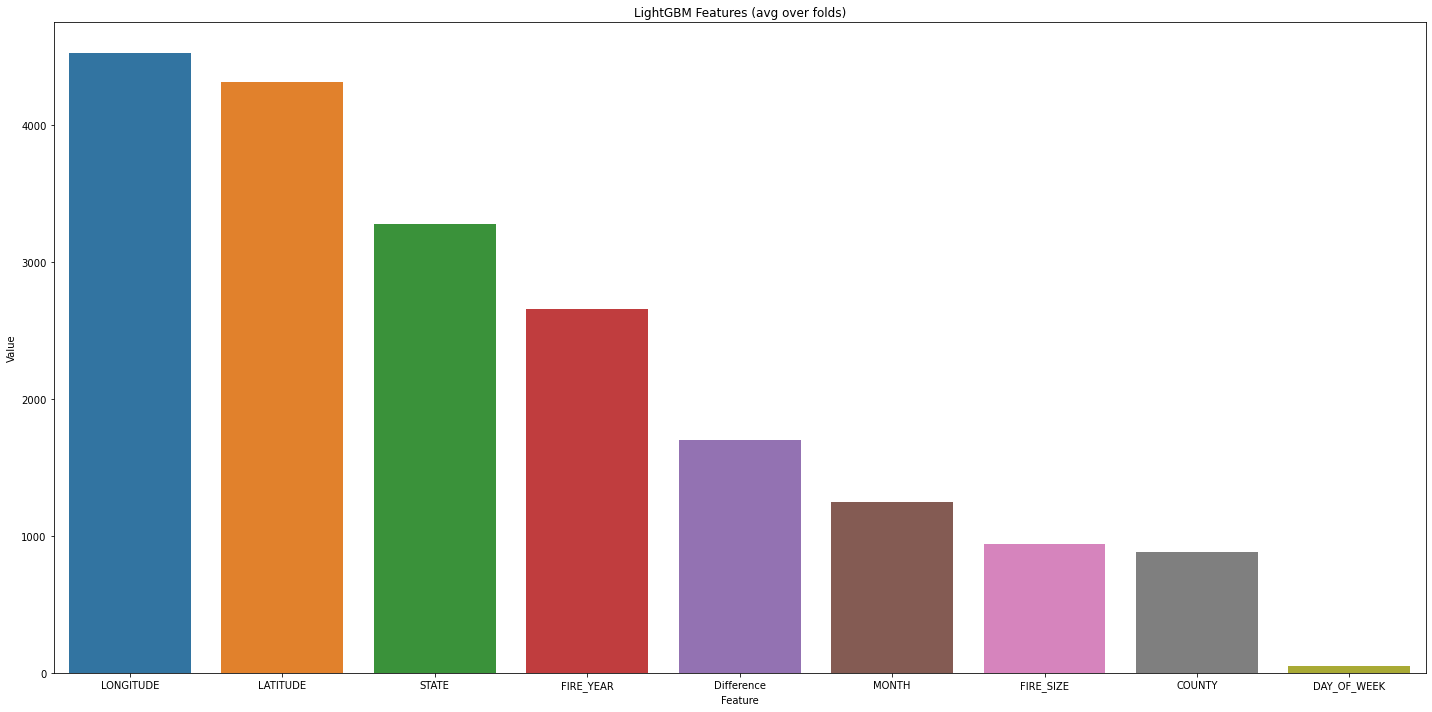

<Figure size 432x288 with 0 Axes>

In [104]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),c.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Feature", y="Value", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [32]:
c = df_less.drop(['LABEL'], axis=1)
c.columns

Index(['FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_SIZE',
       'Difference', 'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

### Further Analysis - Removing Others Label

In [16]:
df_less1 = df_less[df_less['LABEL'] != 4]
df_less1.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_SIZE,Difference,MONTH,DAY_OF_WEEK,LABEL
1,2004,38.933056,-120.404444,4,1211,0.25,0.0,5,6,1
2,2004,38.984167,-120.735556,4,499,0.10,0.0,5,1,2
3,2004,38.559167,-119.913333,4,28,0.10,5.0,6,1,1
4,2004,38.559167,-119.933056,4,28,0.10,5.0,6,1,1
5,2004,38.635278,-120.103611,4,29,0.10,1.0,6,6,1


In [108]:
X = df_less1.drop(['LABEL'], axis=1).values
y = df_less1['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))
y_pred = clf_rf.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

0.7935522396650215
[[ 68281  13864   1399]
 [ 11381 219572  17890]
 [  1949  39602  43044]]


In [72]:
len(df_less1['LABEL'].drop_duplicates())

3

### ROC curve for Multiclass Model with onevsrest Binarizer

In [59]:
X = df_less1.drop(['LABEL'], axis=1).values
y = df_less1['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)

In [61]:
y_score = clf_rf.predict_proba(X_test)

In [73]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

In [74]:
n_classes

3

AUC for Class 1: 0.9657434706948442
AUC for Class 2: 0.8731766993382113
AUC for Class 3: 0.8708734196211639


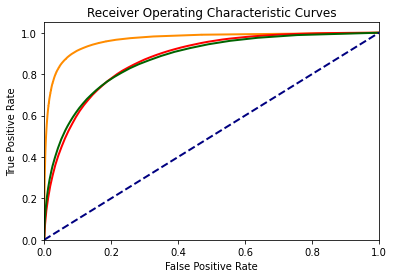

In [76]:
fpr = dict()
tpr = dict()
roc_auc = dict()

color = ['darkorange','red', 'darkgreen']
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=color[i], lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

#### LGBM with 3 labels 

In [26]:
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=100
params['num_class']=5
params['num_leaves']=50

In [111]:
clf = lgb.train(params,d_train,100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 972955, number of used features: 9
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.610070
[LightGBM] [Info] Start training from score -0.515105
[LightGBM] [Info] Start training from score -1.596084
[LightGBM] [Info] Start training from score -34.538776


In [112]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.7506439126868786

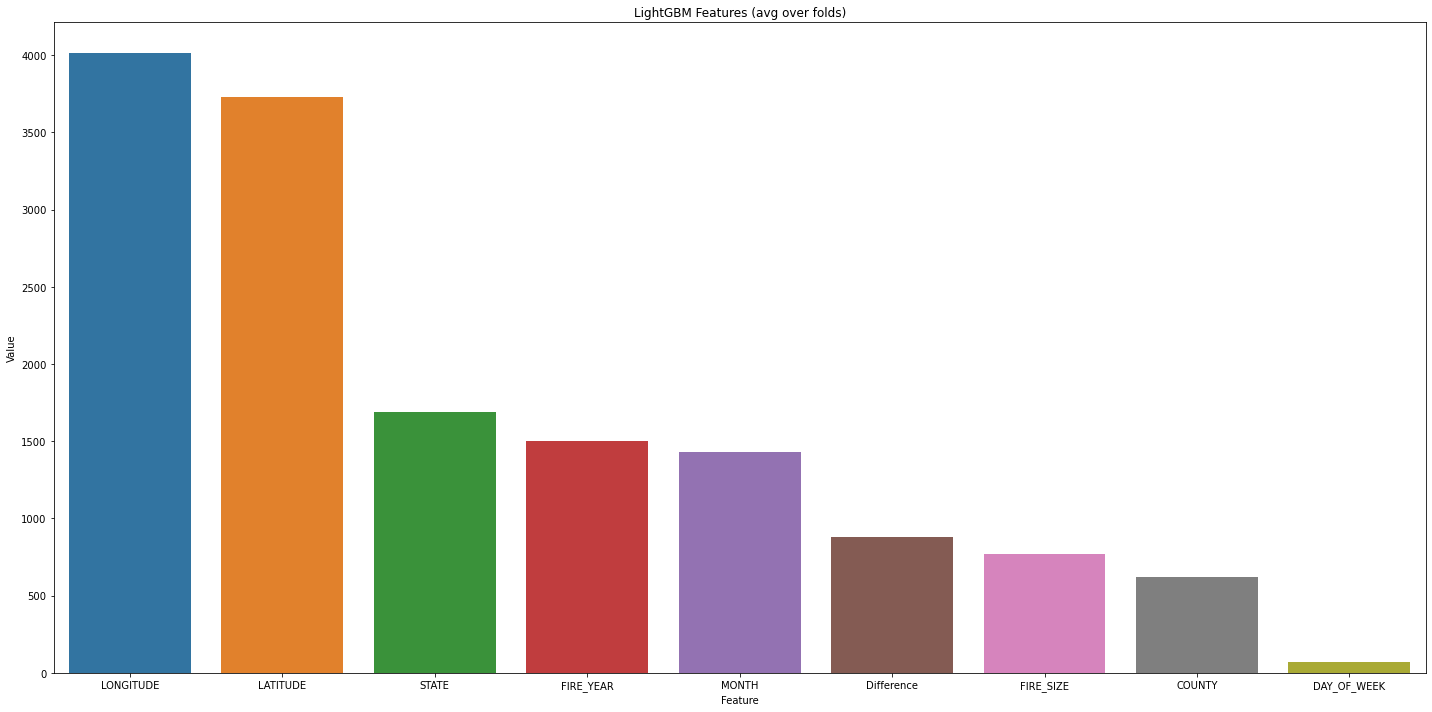

<Figure size 432x288 with 0 Axes>

In [113]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),c.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Feature", y="Value", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-02.png')

## Hyperparameter Tuning with Stratified K fold with RandomForest 

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [27]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 3)]
# number of features at every split
max_features = ['auto' , 'sqrt']
# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 2)]
#max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [29]:
random_grid

{'n_estimators': [200, 400, 600],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [100, 500]}

In [123]:
df_less1.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_SIZE,Difference,MONTH,DAY_OF_WEEK,LABEL
1,2004,38.933056,-120.404444,4,1211,0.25,0.0,5,6,1
2,2004,38.984167,-120.735556,4,499,0.10,0.0,5,1,2
3,2004,38.559167,-119.913333,4,28,0.10,5.0,6,1,1
4,2004,38.559167,-119.933056,4,28,0.10,5.0,6,1,1
5,2004,38.635278,-120.103611,4,29,0.10,1.0,6,6,1


In [30]:
X = df_less1.drop(['LABEL'], axis=1).values
y = df_less1['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [34]:

# Random search of parameters
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 3, cv = StratifiedKFold(n_splits= 2), verbose=2, random_state=42, n_jobs = -1)


In [35]:
rfc_random.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [100, 500],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600]},
                   random_state=42, verbose=2)

In [52]:
rfc_random.best_params_

{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 500}

In [ ]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=500, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [45]:
accuracy=accuracy_score(rfc_predict,y_test)
accuracy

0.7970224134375105

In [46]:
confusion_matrix(y_test, rfc_predict)

array([[ 68283,  13886,   1375],
       [ 10832, 220300,  17711],
       [  1833,  39001,  43761]])

In [49]:
classification_report(y_test, rfc_predict)

'              precision    recall  f1-score   support\n\n           1       0.84      0.82      0.83     83544\n           2       0.81      0.89      0.84    248843\n           3       0.70      0.52      0.59     84595\n\n    accuracy                           0.80    416982\n   macro avg       0.78      0.74      0.76    416982\nweighted avg       0.79      0.80      0.79    416982\n'

## Hyperparameter Tuning with Stratified K fold with LGBM 

In [19]:
import optuna

In [21]:
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback

In [22]:


def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [400]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 40, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 1, step=1),
           }

    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    cv_scores = np.empty(4)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = lgb.LGBMClassifier(objective="multiclass", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="multi_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "multi_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)


In [23]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=1)

[I 2021-10-17 23:53:17,125] A new study created in memory with name: LGBM Classifier
/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[1]	valid_0's multi_logloss: 0.916851
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.885934
[3]	valid_0's multi_logloss: 0.859851
[4]	valid_0's multi_logloss: 0.837319
[5]	valid_0's multi_logloss: 0.817873
[6]	valid_0's multi_logloss: 0.800919
[7]	valid_0's multi_logloss: 0.785811
[8]	valid_0's multi_logloss: 0.772243
[9]	valid_0's multi_logloss: 0.7592
[10]	valid_0's multi_logloss: 0.748077
[11]	valid_0's multi_logloss: 0.738248
[12]	valid_0's multi_logloss: 0.729118
[13]	valid_0's multi_logloss: 0.72078
[14]	valid_0's multi_logloss: 0.712314
[15]	valid_0's multi_logloss: 0.704681
[16]	valid_0's multi_logloss: 0.698085
[17]	valid_0's multi_logloss: 0.692213
[18]	valid_0's multi_logloss: 0.686286
[19]	valid_0's multi_logloss: 0.681052
[20]	valid_0's multi_logloss: 0.676059
[21]	valid_0's multi_logloss: 0.671705
[22]	valid_0's multi_logloss: 0.

[206]	valid_0's multi_logloss: 0.560147
[207]	valid_0's multi_logloss: 0.560069
[208]	valid_0's multi_logloss: 0.559888
[209]	valid_0's multi_logloss: 0.559722
[210]	valid_0's multi_logloss: 0.559592
[211]	valid_0's multi_logloss: 0.559457
[212]	valid_0's multi_logloss: 0.559332
[213]	valid_0's multi_logloss: 0.559247
[214]	valid_0's multi_logloss: 0.559119
[215]	valid_0's multi_logloss: 0.558976
[216]	valid_0's multi_logloss: 0.558839
[217]	valid_0's multi_logloss: 0.558621
[218]	valid_0's multi_logloss: 0.558421
[219]	valid_0's multi_logloss: 0.558297
[220]	valid_0's multi_logloss: 0.55814
[221]	valid_0's multi_logloss: 0.558082
[222]	valid_0's multi_logloss: 0.557933
[223]	valid_0's multi_logloss: 0.557827
[224]	valid_0's multi_logloss: 0.557728
[225]	valid_0's multi_logloss: 0.557577
[226]	valid_0's multi_logloss: 0.557438
[227]	valid_0's multi_logloss: 0.557365
[228]	valid_0's multi_logloss: 0.557271
[229]	valid_0's multi_logloss: 0.557132
[230]	valid_0's multi_logloss: 0.557029
[

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 0 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 1 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 2 is already reported.



[1]	valid_0's multi_logloss: 0.916474
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.885658
[3]	valid_0's multi_logloss: 0.859615


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 3 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 4 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 5 is already reported.



[4]	valid_0's multi_logloss: 0.837052
[5]	valid_0's multi_logloss: 0.817706
[6]	valid_0's multi_logloss: 0.800642


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 6 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 7 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 8 is already reported.



[7]	valid_0's multi_logloss: 0.785341
[8]	valid_0's multi_logloss: 0.770675
[9]	valid_0's multi_logloss: 0.75854


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 9 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 10 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 11 is already reported.



[10]	valid_0's multi_logloss: 0.747401
[11]	valid_0's multi_logloss: 0.736906
[12]	valid_0's multi_logloss: 0.727762


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 12 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 13 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 14 is already reported.



[13]	valid_0's multi_logloss: 0.719282
[14]	valid_0's multi_logloss: 0.710962
[15]	valid_0's multi_logloss: 0.703722


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 15 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 16 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 17 is already reported.



[16]	valid_0's multi_logloss: 0.696838
[17]	valid_0's multi_logloss: 0.690379
[18]	valid_0's multi_logloss: 0.684994


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 18 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 19 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 20 is already reported.



[19]	valid_0's multi_logloss: 0.679644
[20]	valid_0's multi_logloss: 0.67499
[21]	valid_0's multi_logloss: 0.670642


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 21 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 22 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 23 is already reported.



[22]	valid_0's multi_logloss: 0.666665
[23]	valid_0's multi_logloss: 0.662779
[24]	valid_0's multi_logloss: 0.659229


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 24 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 25 is already reported.



[25]	valid_0's multi_logloss: 0.656075
[26]	valid_0's multi_logloss: 0.653354


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 26 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 27 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 28 is already reported.



[27]	valid_0's multi_logloss: 0.650637
[28]	valid_0's multi_logloss: 0.647983
[29]	valid_0's multi_logloss: 0.645645


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 29 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 30 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 31 is already reported.



[30]	valid_0's multi_logloss: 0.643132
[31]	valid_0's multi_logloss: 0.641041
[32]	valid_0's multi_logloss: 0.639072


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 32 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 33 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 34 is already reported.



[33]	valid_0's multi_logloss: 0.637212
[34]	valid_0's multi_logloss: 0.635492
[35]	valid_0's multi_logloss: 0.633512


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 35 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 36 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 37 is already reported.



[36]	valid_0's multi_logloss: 0.631929
[37]	valid_0's multi_logloss: 0.63015
[38]	valid_0's multi_logloss: 0.628758


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 38 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 39 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 40 is already reported.



[39]	valid_0's multi_logloss: 0.627021
[40]	valid_0's multi_logloss: 0.625523
[41]	valid_0's multi_logloss: 0.624017


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 41 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 42 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 43 is already reported.



[42]	valid_0's multi_logloss: 0.622213
[43]	valid_0's multi_logloss: 0.620921
[44]	valid_0's multi_logloss: 0.619731


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 44 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 45 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 46 is already reported.



[45]	valid_0's multi_logloss: 0.618637
[46]	valid_0's multi_logloss: 0.617559
[47]	valid_0's multi_logloss: 0.616476


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 47 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 48 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 49 is already reported.



[48]	valid_0's multi_logloss: 0.61557
[49]	valid_0's multi_logloss: 0.614772
[50]	valid_0's multi_logloss: 0.613803


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 50 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 51 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 52 is already reported.



[51]	valid_0's multi_logloss: 0.613006
[52]	valid_0's multi_logloss: 0.612161
[53]	valid_0's multi_logloss: 0.611448


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 53 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 54 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 55 is already reported.



[54]	valid_0's multi_logloss: 0.610523
[55]	valid_0's multi_logloss: 0.609787
[56]	valid_0's multi_logloss: 0.609094


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 56 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 57 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 58 is already reported.



[57]	valid_0's multi_logloss: 0.608273
[58]	valid_0's multi_logloss: 0.607458
[59]	valid_0's multi_logloss: 0.606603


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 59 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 60 is already reported.



[60]	valid_0's multi_logloss: 0.605777
[61]	valid_0's multi_logloss: 0.605133


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 61 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 62 is already reported.



[62]	valid_0's multi_logloss: 0.604441
[63]	valid_0's multi_logloss: 0.603773


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 63 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 64 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 65 is already reported.



[64]	valid_0's multi_logloss: 0.602847
[65]	valid_0's multi_logloss: 0.602442
[66]	valid_0's multi_logloss: 0.601994


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 66 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 67 is already reported.



[67]	valid_0's multi_logloss: 0.601457
[68]	valid_0's multi_logloss: 0.60089


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 68 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 69 is already reported.



[69]	valid_0's multi_logloss: 0.600256
[70]	valid_0's multi_logloss: 0.59977


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 70 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 71 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 72 is already reported.



[71]	valid_0's multi_logloss: 0.598888
[72]	valid_0's multi_logloss: 0.598282
[73]	valid_0's multi_logloss: 0.597594


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 73 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 74 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 75 is already reported.



[74]	valid_0's multi_logloss: 0.597032
[75]	valid_0's multi_logloss: 0.596458
[76]	valid_0's multi_logloss: 0.596013


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 76 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 77 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 78 is already reported.



[77]	valid_0's multi_logloss: 0.595378
[78]	valid_0's multi_logloss: 0.594975
[79]	valid_0's multi_logloss: 0.594611


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 79 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 80 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 81 is already reported.



[80]	valid_0's multi_logloss: 0.594293
[81]	valid_0's multi_logloss: 0.593844
[82]	valid_0's multi_logloss: 0.593279


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 82 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 83 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 84 is already reported.



[83]	valid_0's multi_logloss: 0.592816
[84]	valid_0's multi_logloss: 0.592342
[85]	valid_0's multi_logloss: 0.591753


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 85 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 86 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 87 is already reported.



[86]	valid_0's multi_logloss: 0.591292
[87]	valid_0's multi_logloss: 0.590826
[88]	valid_0's multi_logloss: 0.590424


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 88 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 89 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 90 is already reported.



[89]	valid_0's multi_logloss: 0.589897
[90]	valid_0's multi_logloss: 0.589328
[91]	valid_0's multi_logloss: 0.588938


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 91 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 92 is already reported.



[92]	valid_0's multi_logloss: 0.588535
[93]	valid_0's multi_logloss: 0.588196


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 93 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 94 is already reported.



[94]	valid_0's multi_logloss: 0.58775
[95]	valid_0's multi_logloss: 0.587298


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 95 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 96 is already reported.



[96]	valid_0's multi_logloss: 0.586899
[97]	valid_0's multi_logloss: 0.586339


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 97 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 98 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 99 is already reported.



[98]	valid_0's multi_logloss: 0.585904
[99]	valid_0's multi_logloss: 0.585581
[100]	valid_0's multi_logloss: 0.585154


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 100 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 101 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 102 is already reported.



[101]	valid_0's multi_logloss: 0.584769
[102]	valid_0's multi_logloss: 0.584374
[103]	valid_0's multi_logloss: 0.583836


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 103 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 104 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 105 is already reported.



[104]	valid_0's multi_logloss: 0.583497
[105]	valid_0's multi_logloss: 0.582995
[106]	valid_0's multi_logloss: 0.582709


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 106 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 107 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 108 is already reported.



[107]	valid_0's multi_logloss: 0.582336
[108]	valid_0's multi_logloss: 0.582034
[109]	valid_0's multi_logloss: 0.581789


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 109 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 110 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 111 is already reported.



[110]	valid_0's multi_logloss: 0.581384
[111]	valid_0's multi_logloss: 0.581114
[112]	valid_0's multi_logloss: 0.580831


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 112 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 113 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 114 is already reported.



[113]	valid_0's multi_logloss: 0.580456
[114]	valid_0's multi_logloss: 0.58015
[115]	valid_0's multi_logloss: 0.579764


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 115 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 116 is already reported.



[116]	valid_0's multi_logloss: 0.579561
[117]	valid_0's multi_logloss: 0.579265


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 117 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 118 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 119 is already reported.



[118]	valid_0's multi_logloss: 0.578924
[119]	valid_0's multi_logloss: 0.578651
[120]	valid_0's multi_logloss: 0.578256


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 120 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 121 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 122 is already reported.



[121]	valid_0's multi_logloss: 0.577992
[122]	valid_0's multi_logloss: 0.577779
[123]	valid_0's multi_logloss: 0.577515


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 123 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 124 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 125 is already reported.



[124]	valid_0's multi_logloss: 0.577256
[125]	valid_0's multi_logloss: 0.576999
[126]	valid_0's multi_logloss: 0.576687


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 126 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 127 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 128 is already reported.



[127]	valid_0's multi_logloss: 0.576483
[128]	valid_0's multi_logloss: 0.576286
[129]	valid_0's multi_logloss: 0.575979


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 129 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 130 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 131 is already reported.



[130]	valid_0's multi_logloss: 0.575675
[131]	valid_0's multi_logloss: 0.575226
[132]	valid_0's multi_logloss: 0.574847


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 132 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 133 is already reported.



[133]	valid_0's multi_logloss: 0.574646
[134]	valid_0's multi_logloss: 0.574329


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 134 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 135 is already reported.



[135]	valid_0's multi_logloss: 0.574045
[136]	valid_0's multi_logloss: 0.573751


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 136 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 137 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 138 is already reported.



[137]	valid_0's multi_logloss: 0.573418
[138]	valid_0's multi_logloss: 0.573146
[139]	valid_0's multi_logloss: 0.572924


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 139 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 140 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 141 is already reported.



[140]	valid_0's multi_logloss: 0.572726
[141]	valid_0's multi_logloss: 0.572503
[142]	valid_0's multi_logloss: 0.572346


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 142 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 143 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 144 is already reported.



[143]	valid_0's multi_logloss: 0.572143
[144]	valid_0's multi_logloss: 0.571922
[145]	valid_0's multi_logloss: 0.57173


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 145 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 146 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 147 is already reported.



[146]	valid_0's multi_logloss: 0.57152
[147]	valid_0's multi_logloss: 0.571343
[148]	valid_0's multi_logloss: 0.571128


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 148 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 149 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 150 is already reported.



[149]	valid_0's multi_logloss: 0.57085
[150]	valid_0's multi_logloss: 0.570623
[151]	valid_0's multi_logloss: 0.570452


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 151 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 152 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 153 is already reported.



[152]	valid_0's multi_logloss: 0.570182
[153]	valid_0's multi_logloss: 0.569904
[154]	valid_0's multi_logloss: 0.5696


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 154 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 155 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 156 is already reported.



[155]	valid_0's multi_logloss: 0.569372
[156]	valid_0's multi_logloss: 0.569079
[157]	valid_0's multi_logloss: 0.568902


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 157 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 158 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 159 is already reported.



[158]	valid_0's multi_logloss: 0.568689
[159]	valid_0's multi_logloss: 0.568398
[160]	valid_0's multi_logloss: 0.568153


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 160 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 161 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 162 is already reported.



[161]	valid_0's multi_logloss: 0.567927
[162]	valid_0's multi_logloss: 0.567765
[163]	valid_0's multi_logloss: 0.567558


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 163 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 164 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 165 is already reported.



[164]	valid_0's multi_logloss: 0.567297
[165]	valid_0's multi_logloss: 0.567089
[166]	valid_0's multi_logloss: 0.567002


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 166 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 167 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 168 is already reported.



[167]	valid_0's multi_logloss: 0.566847
[168]	valid_0's multi_logloss: 0.566754
[169]	valid_0's multi_logloss: 0.566647


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 169 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 170 is already reported.



[170]	valid_0's multi_logloss: 0.566462
[171]	valid_0's multi_logloss: 0.566289


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 171 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 172 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 173 is already reported.



[172]	valid_0's multi_logloss: 0.566132
[173]	valid_0's multi_logloss: 0.566021
[174]	valid_0's multi_logloss: 0.565927


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 174 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 175 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 176 is already reported.



[175]	valid_0's multi_logloss: 0.56577
[176]	valid_0's multi_logloss: 0.565586
[177]	valid_0's multi_logloss: 0.56541


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 177 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 178 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 179 is already reported.



[178]	valid_0's multi_logloss: 0.565249
[179]	valid_0's multi_logloss: 0.565066
[180]	valid_0's multi_logloss: 0.564924


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 180 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 181 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 182 is already reported.



[181]	valid_0's multi_logloss: 0.56486
[182]	valid_0's multi_logloss: 0.564673
[183]	valid_0's multi_logloss: 0.564528


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 183 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 184 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 185 is already reported.



[184]	valid_0's multi_logloss: 0.564332
[185]	valid_0's multi_logloss: 0.564232
[186]	valid_0's multi_logloss: 0.564055


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 186 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 187 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 188 is already reported.



[187]	valid_0's multi_logloss: 0.563853
[188]	valid_0's multi_logloss: 0.563672
[189]	valid_0's multi_logloss: 0.563507


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 189 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 190 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 191 is already reported.



[190]	valid_0's multi_logloss: 0.56335
[191]	valid_0's multi_logloss: 0.5632
[192]	valid_0's multi_logloss: 0.563081


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 192 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 193 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 194 is already reported.



[193]	valid_0's multi_logloss: 0.562981
[194]	valid_0's multi_logloss: 0.562874
[195]	valid_0's multi_logloss: 0.562796


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 195 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 196 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 197 is already reported.



[196]	valid_0's multi_logloss: 0.562615
[197]	valid_0's multi_logloss: 0.562453
[198]	valid_0's multi_logloss: 0.562263


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 198 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 199 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 200 is already reported.



[199]	valid_0's multi_logloss: 0.562074
[200]	valid_0's multi_logloss: 0.561836
[201]	valid_0's multi_logloss: 0.561725


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 201 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 202 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 203 is already reported.



[202]	valid_0's multi_logloss: 0.561531
[203]	valid_0's multi_logloss: 0.561323
[204]	valid_0's multi_logloss: 0.561158


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 204 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 205 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 206 is already reported.



[205]	valid_0's multi_logloss: 0.561056
[206]	valid_0's multi_logloss: 0.560956
[207]	valid_0's multi_logloss: 0.56078


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 207 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 208 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 209 is already reported.



[208]	valid_0's multi_logloss: 0.560644
[209]	valid_0's multi_logloss: 0.560543
[210]	valid_0's multi_logloss: 0.560432


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 210 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 211 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 212 is already reported.



[211]	valid_0's multi_logloss: 0.560253
[212]	valid_0's multi_logloss: 0.560096
[213]	valid_0's multi_logloss: 0.559985


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 213 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 214 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 215 is already reported.



[214]	valid_0's multi_logloss: 0.559845
[215]	valid_0's multi_logloss: 0.559727
[216]	valid_0's multi_logloss: 0.559602


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 216 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 217 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 218 is already reported.



[217]	valid_0's multi_logloss: 0.559499
[218]	valid_0's multi_logloss: 0.559383
[219]	valid_0's multi_logloss: 0.559186


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 219 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 220 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 221 is already reported.



[220]	valid_0's multi_logloss: 0.559097
[221]	valid_0's multi_logloss: 0.558923
[222]	valid_0's multi_logloss: 0.558774


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 222 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 223 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 224 is already reported.



[223]	valid_0's multi_logloss: 0.558675
[224]	valid_0's multi_logloss: 0.558582
[225]	valid_0's multi_logloss: 0.558498


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 225 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 226 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 227 is already reported.



[226]	valid_0's multi_logloss: 0.558373
[227]	valid_0's multi_logloss: 0.558229
[228]	valid_0's multi_logloss: 0.558075


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 228 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 229 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 230 is already reported.



[229]	valid_0's multi_logloss: 0.557907
[230]	valid_0's multi_logloss: 0.557741
[231]	valid_0's multi_logloss: 0.557515


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 231 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 232 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 233 is already reported.



[232]	valid_0's multi_logloss: 0.557343
[233]	valid_0's multi_logloss: 0.557241
[234]	valid_0's multi_logloss: 0.557097


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 234 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 235 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 236 is already reported.



[235]	valid_0's multi_logloss: 0.556994
[236]	valid_0's multi_logloss: 0.556926
[237]	valid_0's multi_logloss: 0.556817


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 237 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 238 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 239 is already reported.



[238]	valid_0's multi_logloss: 0.556739
[239]	valid_0's multi_logloss: 0.556608
[240]	valid_0's multi_logloss: 0.556421


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 240 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 241 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 242 is already reported.



[241]	valid_0's multi_logloss: 0.556319
[242]	valid_0's multi_logloss: 0.55623
[243]	valid_0's multi_logloss: 0.556053


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 243 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 244 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 245 is already reported.



[244]	valid_0's multi_logloss: 0.555883
[245]	valid_0's multi_logloss: 0.555755
[246]	valid_0's multi_logloss: 0.55562


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 246 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 247 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 248 is already reported.



[247]	valid_0's multi_logloss: 0.555524
[248]	valid_0's multi_logloss: 0.555402
[249]	valid_0's multi_logloss: 0.555239


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 249 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 250 is already reported.



[250]	valid_0's multi_logloss: 0.55507
[251]	valid_0's multi_logloss: 0.554933


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 251 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 252 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 253 is already reported.



[252]	valid_0's multi_logloss: 0.554828
[253]	valid_0's multi_logloss: 0.554725
[254]	valid_0's multi_logloss: 0.554614


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 254 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 255 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 256 is already reported.



[255]	valid_0's multi_logloss: 0.554548
[256]	valid_0's multi_logloss: 0.554457
[257]	valid_0's multi_logloss: 0.554318


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 257 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 258 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 259 is already reported.



[258]	valid_0's multi_logloss: 0.554155
[259]	valid_0's multi_logloss: 0.554062
[260]	valid_0's multi_logloss: 0.553914


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 260 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 261 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 262 is already reported.



[261]	valid_0's multi_logloss: 0.553832
[262]	valid_0's multi_logloss: 0.553722
[263]	valid_0's multi_logloss: 0.553631


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 263 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 264 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 265 is already reported.



[264]	valid_0's multi_logloss: 0.553537
[265]	valid_0's multi_logloss: 0.553369
[266]	valid_0's multi_logloss: 0.553331


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 266 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 267 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 268 is already reported.



[267]	valid_0's multi_logloss: 0.553216
[268]	valid_0's multi_logloss: 0.553102
[269]	valid_0's multi_logloss: 0.552954


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 269 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 270 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 271 is already reported.



[270]	valid_0's multi_logloss: 0.552847
[271]	valid_0's multi_logloss: 0.552744
[272]	valid_0's multi_logloss: 0.552608


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 272 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 273 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 274 is already reported.



[273]	valid_0's multi_logloss: 0.55256
[274]	valid_0's multi_logloss: 0.552459
[275]	valid_0's multi_logloss: 0.552367


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 275 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 276 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 277 is already reported.



[276]	valid_0's multi_logloss: 0.552227
[277]	valid_0's multi_logloss: 0.552133
[278]	valid_0's multi_logloss: 0.552031


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 278 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 279 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 280 is already reported.



[279]	valid_0's multi_logloss: 0.551903
[280]	valid_0's multi_logloss: 0.55177
[281]	valid_0's multi_logloss: 0.55162


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 281 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 282 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 283 is already reported.



[282]	valid_0's multi_logloss: 0.551551
[283]	valid_0's multi_logloss: 0.551407
[284]	valid_0's multi_logloss: 0.551323


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 284 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 285 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 286 is already reported.



[285]	valid_0's multi_logloss: 0.551236
[286]	valid_0's multi_logloss: 0.55111
[287]	valid_0's multi_logloss: 0.550981


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 287 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 288 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 289 is already reported.



[288]	valid_0's multi_logloss: 0.550874
[289]	valid_0's multi_logloss: 0.550781
[290]	valid_0's multi_logloss: 0.550695


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 290 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 291 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 292 is already reported.



[291]	valid_0's multi_logloss: 0.550587
[292]	valid_0's multi_logloss: 0.550428
[293]	valid_0's multi_logloss: 0.550311


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 293 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 294 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 295 is already reported.



[294]	valid_0's multi_logloss: 0.550181
[295]	valid_0's multi_logloss: 0.550055
[296]	valid_0's multi_logloss: 0.549966


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 296 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 297 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 298 is already reported.



[297]	valid_0's multi_logloss: 0.54987
[298]	valid_0's multi_logloss: 0.549765
[299]	valid_0's multi_logloss: 0.54967


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 299 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 300 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 301 is already reported.



[300]	valid_0's multi_logloss: 0.549577
[301]	valid_0's multi_logloss: 0.549485
[302]	valid_0's multi_logloss: 0.549411


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 302 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 303 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 304 is already reported.



[303]	valid_0's multi_logloss: 0.549348
[304]	valid_0's multi_logloss: 0.549223
[305]	valid_0's multi_logloss: 0.549154


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 305 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 306 is already reported.



[306]	valid_0's multi_logloss: 0.549054
[307]	valid_0's multi_logloss: 0.548971


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 307 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 308 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 309 is already reported.



[308]	valid_0's multi_logloss: 0.54887
[309]	valid_0's multi_logloss: 0.54878
[310]	valid_0's multi_logloss: 0.548688


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 310 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 311 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 312 is already reported.



[311]	valid_0's multi_logloss: 0.548548
[312]	valid_0's multi_logloss: 0.548502
[313]	valid_0's multi_logloss: 0.548421


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 313 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 314 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 315 is already reported.



[314]	valid_0's multi_logloss: 0.548376
[315]	valid_0's multi_logloss: 0.548294
[316]	valid_0's multi_logloss: 0.548258


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 316 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 317 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 318 is already reported.



[317]	valid_0's multi_logloss: 0.548167
[318]	valid_0's multi_logloss: 0.548008
[319]	valid_0's multi_logloss: 0.547952


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 319 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 320 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 321 is already reported.



[320]	valid_0's multi_logloss: 0.547862
[321]	valid_0's multi_logloss: 0.547793
[322]	valid_0's multi_logloss: 0.547699


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 322 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 323 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 324 is already reported.



[323]	valid_0's multi_logloss: 0.54757
[324]	valid_0's multi_logloss: 0.547477
[325]	valid_0's multi_logloss: 0.547397


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 325 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 326 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 327 is already reported.



[326]	valid_0's multi_logloss: 0.547325
[327]	valid_0's multi_logloss: 0.547241
[328]	valid_0's multi_logloss: 0.547136


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 328 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 329 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 330 is already reported.



[329]	valid_0's multi_logloss: 0.547064
[330]	valid_0's multi_logloss: 0.547013
[331]	valid_0's multi_logloss: 0.546974


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 331 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 332 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 333 is already reported.



[332]	valid_0's multi_logloss: 0.546887
[333]	valid_0's multi_logloss: 0.546818
[334]	valid_0's multi_logloss: 0.546719


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 334 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 335 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 336 is already reported.



[335]	valid_0's multi_logloss: 0.546647
[336]	valid_0's multi_logloss: 0.546587
[337]	valid_0's multi_logloss: 0.546559


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 337 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 338 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 339 is already reported.



[338]	valid_0's multi_logloss: 0.546453
[339]	valid_0's multi_logloss: 0.546341
[340]	valid_0's multi_logloss: 0.546278


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 340 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 341 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 342 is already reported.



[341]	valid_0's multi_logloss: 0.546214
[342]	valid_0's multi_logloss: 0.546141
[343]	valid_0's multi_logloss: 0.546033


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 343 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 344 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 345 is already reported.



[344]	valid_0's multi_logloss: 0.54596
[345]	valid_0's multi_logloss: 0.545883
[346]	valid_0's multi_logloss: 0.545801


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 346 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 347 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 348 is already reported.



[347]	valid_0's multi_logloss: 0.545712
[348]	valid_0's multi_logloss: 0.545641
[349]	valid_0's multi_logloss: 0.545543


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 349 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 350 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 351 is already reported.



[350]	valid_0's multi_logloss: 0.545471
[351]	valid_0's multi_logloss: 0.545384
[352]	valid_0's multi_logloss: 0.545335


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 352 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 353 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 354 is already reported.



[353]	valid_0's multi_logloss: 0.545255
[354]	valid_0's multi_logloss: 0.545198
[355]	valid_0's multi_logloss: 0.545108


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 355 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 356 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 357 is already reported.



[356]	valid_0's multi_logloss: 0.545068
[357]	valid_0's multi_logloss: 0.544979
[358]	valid_0's multi_logloss: 0.544882


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 358 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 359 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 360 is already reported.



[359]	valid_0's multi_logloss: 0.54478
[360]	valid_0's multi_logloss: 0.544694
[361]	valid_0's multi_logloss: 0.54457


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 361 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 362 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 363 is already reported.



[362]	valid_0's multi_logloss: 0.544482
[363]	valid_0's multi_logloss: 0.544372
[364]	valid_0's multi_logloss: 0.544335


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 364 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 365 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 366 is already reported.



[365]	valid_0's multi_logloss: 0.544241
[366]	valid_0's multi_logloss: 0.544148
[367]	valid_0's multi_logloss: 0.544074


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 367 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 368 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 369 is already reported.



[368]	valid_0's multi_logloss: 0.544013
[369]	valid_0's multi_logloss: 0.543961
[370]	valid_0's multi_logloss: 0.543882


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 370 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 371 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 372 is already reported.



[371]	valid_0's multi_logloss: 0.543852
[372]	valid_0's multi_logloss: 0.54379
[373]	valid_0's multi_logloss: 0.54376


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 373 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 374 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 375 is already reported.



[374]	valid_0's multi_logloss: 0.543684
[375]	valid_0's multi_logloss: 0.543615
[376]	valid_0's multi_logloss: 0.543532


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 376 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 377 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 378 is already reported.



[377]	valid_0's multi_logloss: 0.543482
[378]	valid_0's multi_logloss: 0.543465
[379]	valid_0's multi_logloss: 0.54342


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 379 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 380 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 381 is already reported.



[380]	valid_0's multi_logloss: 0.543366
[381]	valid_0's multi_logloss: 0.543245
[382]	valid_0's multi_logloss: 0.543185


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 382 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 383 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 384 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 385 is already reported.



[383]	valid_0's multi_logloss: 0.543149
[384]	valid_0's multi_logloss: 0.543097
[385]	valid_0's multi_logloss: 0.543057
[386]	valid_0's multi_logloss: 0.54298


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 386 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 387 is already reported.



[387]	valid_0's multi_logloss: 0.542919
[388]	valid_0's multi_logloss: 0.542852


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 388 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 389 is already reported.



[389]	valid_0's multi_logloss: 0.542783
[390]	valid_0's multi_logloss: 0.542747


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 390 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 391 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 392 is already reported.



[391]	valid_0's multi_logloss: 0.542649
[392]	valid_0's multi_logloss: 0.542602
[393]	valid_0's multi_logloss: 0.542549


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 393 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 394 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 395 is already reported.



[394]	valid_0's multi_logloss: 0.542505
[395]	valid_0's multi_logloss: 0.542457
[396]	valid_0's multi_logloss: 0.542421


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 396 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 397 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 398 is already reported.



[397]	valid_0's multi_logloss: 0.542338
[398]	valid_0's multi_logloss: 0.542253
[399]	valid_0's multi_logloss: 0.54222


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 399 is already reported.



[400]	valid_0's multi_logloss: 0.54213
Did not meet early stopping. Best iteration is:
[400]	valid_0's multi_logloss: 0.54213


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 0 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 1 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 2 is already reported.



[1]	valid_0's multi_logloss: 0.916693
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.886096
[3]	valid_0's multi_logloss: 0.860021


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 3 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 4 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 5 is already reported.



[4]	valid_0's multi_logloss: 0.837565
[5]	valid_0's multi_logloss: 0.817962
[6]	valid_0's multi_logloss: 0.800996


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 6 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 7 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 8 is already reported.



[7]	valid_0's multi_logloss: 0.785778
[8]	valid_0's multi_logloss: 0.772343
[9]	valid_0's multi_logloss: 0.760429


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 9 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 10 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 11 is already reported.



[10]	valid_0's multi_logloss: 0.749346
[11]	valid_0's multi_logloss: 0.739233
[12]	valid_0's multi_logloss: 0.730367


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 12 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 13 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 14 is already reported.



[13]	valid_0's multi_logloss: 0.721805
[14]	valid_0's multi_logloss: 0.713351
[15]	valid_0's multi_logloss: 0.7062


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 15 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 16 is already reported.



[16]	valid_0's multi_logloss: 0.699226
[17]	valid_0's multi_logloss: 0.692877


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 17 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 18 is already reported.



[18]	valid_0's multi_logloss: 0.687104
[19]	valid_0's multi_logloss: 0.681646


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 19 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 20 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 21 is already reported.



[20]	valid_0's multi_logloss: 0.676862
[21]	valid_0's multi_logloss: 0.672506
[22]	valid_0's multi_logloss: 0.668564


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 22 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 23 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 24 is already reported.



[23]	valid_0's multi_logloss: 0.664901
[24]	valid_0's multi_logloss: 0.661401
[25]	valid_0's multi_logloss: 0.658362


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 25 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 26 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 27 is already reported.



[26]	valid_0's multi_logloss: 0.655339
[27]	valid_0's multi_logloss: 0.652655
[28]	valid_0's multi_logloss: 0.65003


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 28 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 29 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 30 is already reported.



[29]	valid_0's multi_logloss: 0.647845
[30]	valid_0's multi_logloss: 0.645513
[31]	valid_0's multi_logloss: 0.643365


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 31 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 32 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 33 is already reported.



[32]	valid_0's multi_logloss: 0.641089
[33]	valid_0's multi_logloss: 0.639157
[34]	valid_0's multi_logloss: 0.637424


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 34 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 35 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 36 is already reported.



[35]	valid_0's multi_logloss: 0.635679
[36]	valid_0's multi_logloss: 0.633677
[37]	valid_0's multi_logloss: 0.632265


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 37 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 38 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 39 is already reported.



[38]	valid_0's multi_logloss: 0.630473
[39]	valid_0's multi_logloss: 0.628797
[40]	valid_0's multi_logloss: 0.627227


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 40 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 41 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 42 is already reported.



[41]	valid_0's multi_logloss: 0.625902
[42]	valid_0's multi_logloss: 0.624709
[43]	valid_0's multi_logloss: 0.623357


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 43 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 44 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 45 is already reported.



[44]	valid_0's multi_logloss: 0.621951
[45]	valid_0's multi_logloss: 0.620869
[46]	valid_0's multi_logloss: 0.619476


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 46 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 47 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 48 is already reported.



[47]	valid_0's multi_logloss: 0.618459
[48]	valid_0's multi_logloss: 0.617346
[49]	valid_0's multi_logloss: 0.616577


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 49 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 50 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 51 is already reported.



[50]	valid_0's multi_logloss: 0.615582
[51]	valid_0's multi_logloss: 0.614751
[52]	valid_0's multi_logloss: 0.613796


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 52 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 53 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 54 is already reported.



[53]	valid_0's multi_logloss: 0.612977
[54]	valid_0's multi_logloss: 0.612117
[55]	valid_0's multi_logloss: 0.611137


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 55 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 56 is already reported.



[56]	valid_0's multi_logloss: 0.610509
[57]	valid_0's multi_logloss: 0.609755


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 57 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 58 is already reported.



[58]	valid_0's multi_logloss: 0.609062
[59]	valid_0's multi_logloss: 0.608474


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 59 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 60 is already reported.



[60]	valid_0's multi_logloss: 0.60783
[61]	valid_0's multi_logloss: 0.607035


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 61 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 62 is already reported.



[62]	valid_0's multi_logloss: 0.606236
[63]	valid_0's multi_logloss: 0.605643


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 63 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 64 is already reported.



[64]	valid_0's multi_logloss: 0.604958
[65]	valid_0's multi_logloss: 0.604039


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 65 is already reported.



[66]	valid_0's multi_logloss: 0.60351


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 66 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 67 is already reported.



[67]	valid_0's multi_logloss: 0.602956
[68]	valid_0's multi_logloss: 0.602311


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 68 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 69 is already reported.



[69]	valid_0's multi_logloss: 0.601643
[70]	valid_0's multi_logloss: 0.600962


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 70 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 71 is already reported.



[71]	valid_0's multi_logloss: 0.600342
[72]	valid_0's multi_logloss: 0.599456


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 72 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 73 is already reported.



[73]	valid_0's multi_logloss: 0.598987
[74]	valid_0's multi_logloss: 0.598441


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 74 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 75 is already reported.



[75]	valid_0's multi_logloss: 0.598052
[76]	valid_0's multi_logloss: 0.597501


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 76 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 77 is already reported.



[77]	valid_0's multi_logloss: 0.597187
[78]	valid_0's multi_logloss: 0.596544


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 78 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 79 is already reported.



[79]	valid_0's multi_logloss: 0.596057
[80]	valid_0's multi_logloss: 0.595563


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 80 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 81 is already reported.



[81]	valid_0's multi_logloss: 0.594831
[82]	valid_0's multi_logloss: 0.594467


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 82 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 83 is already reported.



[83]	valid_0's multi_logloss: 0.593788
[84]	valid_0's multi_logloss: 0.59331


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 84 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 85 is already reported.



[85]	valid_0's multi_logloss: 0.59278
[86]	valid_0's multi_logloss: 0.592408


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 86 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 87 is already reported.



[87]	valid_0's multi_logloss: 0.591906
[88]	valid_0's multi_logloss: 0.591425


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 88 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 89 is already reported.



[89]	valid_0's multi_logloss: 0.591052
[90]	valid_0's multi_logloss: 0.59052


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 90 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 91 is already reported.



[91]	valid_0's multi_logloss: 0.590183
[92]	valid_0's multi_logloss: 0.589709


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 92 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 93 is already reported.



[93]	valid_0's multi_logloss: 0.589276
[94]	valid_0's multi_logloss: 0.588887


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 94 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 95 is already reported.



[95]	valid_0's multi_logloss: 0.588609
[96]	valid_0's multi_logloss: 0.588274


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 96 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 97 is already reported.



[97]	valid_0's multi_logloss: 0.587937
[98]	valid_0's multi_logloss: 0.587622


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 98 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 99 is already reported.



[99]	valid_0's multi_logloss: 0.587248
[100]	valid_0's multi_logloss: 0.586868


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 100 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 101 is already reported.



[101]	valid_0's multi_logloss: 0.586655
[102]	valid_0's multi_logloss: 0.586305


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 102 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 103 is already reported.



[103]	valid_0's multi_logloss: 0.585973
[104]	valid_0's multi_logloss: 0.585404


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 104 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 105 is already reported.



[105]	valid_0's multi_logloss: 0.584937
[106]	valid_0's multi_logloss: 0.584655


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 106 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 107 is already reported.



[107]	valid_0's multi_logloss: 0.584313
[108]	valid_0's multi_logloss: 0.583747


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 108 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 109 is already reported.



[109]	valid_0's multi_logloss: 0.583356
[110]	valid_0's multi_logloss: 0.582849


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 110 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 111 is already reported.



[111]	valid_0's multi_logloss: 0.582606
[112]	valid_0's multi_logloss: 0.582346


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 112 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 113 is already reported.



[113]	valid_0's multi_logloss: 0.582057
[114]	valid_0's multi_logloss: 0.581719


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 114 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 115 is already reported.



[115]	valid_0's multi_logloss: 0.581322
[116]	valid_0's multi_logloss: 0.581079


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 116 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 117 is already reported.



[117]	valid_0's multi_logloss: 0.580706
[118]	valid_0's multi_logloss: 0.580385


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 118 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 119 is already reported.



[119]	valid_0's multi_logloss: 0.579948
[120]	valid_0's multi_logloss: 0.579564


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 120 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 121 is already reported.



[121]	valid_0's multi_logloss: 0.579271
[122]	valid_0's multi_logloss: 0.578929


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 122 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 123 is already reported.



[123]	valid_0's multi_logloss: 0.578664
[124]	valid_0's multi_logloss: 0.57839


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 124 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 125 is already reported.



[125]	valid_0's multi_logloss: 0.578099
[126]	valid_0's multi_logloss: 0.577933


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 126 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 127 is already reported.



[127]	valid_0's multi_logloss: 0.577648
[128]	valid_0's multi_logloss: 0.577322


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 128 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 129 is already reported.



[129]	valid_0's multi_logloss: 0.577034
[130]	valid_0's multi_logloss: 0.576743


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 130 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 131 is already reported.



[131]	valid_0's multi_logloss: 0.57651
[132]	valid_0's multi_logloss: 0.576265


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 132 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 133 is already reported.



[133]	valid_0's multi_logloss: 0.57605
[134]	valid_0's multi_logloss: 0.575864


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 134 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 135 is already reported.



[135]	valid_0's multi_logloss: 0.575565
[136]	valid_0's multi_logloss: 0.575354


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 136 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 137 is already reported.



[137]	valid_0's multi_logloss: 0.575117
[138]	valid_0's multi_logloss: 0.574859


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 138 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 139 is already reported.



[139]	valid_0's multi_logloss: 0.574609
[140]	valid_0's multi_logloss: 0.574427


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 140 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 141 is already reported.



[141]	valid_0's multi_logloss: 0.574238
[142]	valid_0's multi_logloss: 0.574051


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 142 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 143 is already reported.



[143]	valid_0's multi_logloss: 0.573828
[144]	valid_0's multi_logloss: 0.57365


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 144 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 145 is already reported.



[145]	valid_0's multi_logloss: 0.573527
[146]	valid_0's multi_logloss: 0.573321


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 146 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 147 is already reported.



[147]	valid_0's multi_logloss: 0.57313
[148]	valid_0's multi_logloss: 0.572967


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 148 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 149 is already reported.



[149]	valid_0's multi_logloss: 0.572845
[150]	valid_0's multi_logloss: 0.572596


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 150 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 151 is already reported.



[151]	valid_0's multi_logloss: 0.572384
[152]	valid_0's multi_logloss: 0.572159


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 152 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 153 is already reported.



[153]	valid_0's multi_logloss: 0.571982
[154]	valid_0's multi_logloss: 0.571823


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 154 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 155 is already reported.



[155]	valid_0's multi_logloss: 0.571642
[156]	valid_0's multi_logloss: 0.571472


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 156 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 157 is already reported.



[157]	valid_0's multi_logloss: 0.571253
[158]	valid_0's multi_logloss: 0.571031


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 158 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 159 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 160 is already reported.



[159]	valid_0's multi_logloss: 0.570867
[160]	valid_0's multi_logloss: 0.570731
[161]	valid_0's multi_logloss: 0.570544


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 161 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 162 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 163 is already reported.



[162]	valid_0's multi_logloss: 0.570409
[163]	valid_0's multi_logloss: 0.570231
[164]	valid_0's multi_logloss: 0.569999


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 164 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 165 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 166 is already reported.



[165]	valid_0's multi_logloss: 0.569813
[166]	valid_0's multi_logloss: 0.569651
[167]	valid_0's multi_logloss: 0.569506


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 167 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 168 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 169 is already reported.



[168]	valid_0's multi_logloss: 0.569372
[169]	valid_0's multi_logloss: 0.569174
[170]	valid_0's multi_logloss: 0.569


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 170 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 171 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 172 is already reported.



[171]	valid_0's multi_logloss: 0.568831
[172]	valid_0's multi_logloss: 0.568615
[173]	valid_0's multi_logloss: 0.56846


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 173 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 174 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 175 is already reported.



[174]	valid_0's multi_logloss: 0.568293
[175]	valid_0's multi_logloss: 0.568149
[176]	valid_0's multi_logloss: 0.567995


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 176 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 177 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 178 is already reported.



[177]	valid_0's multi_logloss: 0.567852
[178]	valid_0's multi_logloss: 0.567638
[179]	valid_0's multi_logloss: 0.567342


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 179 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 180 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 181 is already reported.



[180]	valid_0's multi_logloss: 0.56713
[181]	valid_0's multi_logloss: 0.566912
[182]	valid_0's multi_logloss: 0.566756


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 182 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 183 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 184 is already reported.



[183]	valid_0's multi_logloss: 0.566561
[184]	valid_0's multi_logloss: 0.566424
[185]	valid_0's multi_logloss: 0.566223


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 185 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 186 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 187 is already reported.



[186]	valid_0's multi_logloss: 0.566006
[187]	valid_0's multi_logloss: 0.565882
[188]	valid_0's multi_logloss: 0.565736


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 188 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 189 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 190 is already reported.



[189]	valid_0's multi_logloss: 0.565603
[190]	valid_0's multi_logloss: 0.565511
[191]	valid_0's multi_logloss: 0.565355


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 191 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 192 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 193 is already reported.



[192]	valid_0's multi_logloss: 0.565267
[193]	valid_0's multi_logloss: 0.565133
[194]	valid_0's multi_logloss: 0.56499


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 194 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 195 is already reported.



[195]	valid_0's multi_logloss: 0.564819
[196]	valid_0's multi_logloss: 0.564668


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 196 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 197 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 198 is already reported.



[197]	valid_0's multi_logloss: 0.564505
[198]	valid_0's multi_logloss: 0.564403
[199]	valid_0's multi_logloss: 0.564255


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 199 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 200 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 201 is already reported.



[200]	valid_0's multi_logloss: 0.564042
[201]	valid_0's multi_logloss: 0.563897
[202]	valid_0's multi_logloss: 0.563745


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 202 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 203 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 204 is already reported.



[203]	valid_0's multi_logloss: 0.563603
[204]	valid_0's multi_logloss: 0.563468
[205]	valid_0's multi_logloss: 0.563353


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 205 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 206 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 207 is already reported.



[206]	valid_0's multi_logloss: 0.563196
[207]	valid_0's multi_logloss: 0.563007
[208]	valid_0's multi_logloss: 0.562919


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 208 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 209 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 210 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 211 is already reported.



[209]	valid_0's multi_logloss: 0.562847
[210]	valid_0's multi_logloss: 0.562769
[211]	valid_0's multi_logloss: 0.56262
[212]	valid_0's multi_logloss: 0.562537


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 212 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 213 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 214 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 215 is already reported.



[213]	valid_0's multi_logloss: 0.562463
[214]	valid_0's multi_logloss: 0.562301
[215]	valid_0's multi_logloss: 0.562178
[216]	valid_0's multi_logloss: 0.562015


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 216 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 217 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 218 is already reported.



[217]	valid_0's multi_logloss: 0.561773
[218]	valid_0's multi_logloss: 0.561681
[219]	valid_0's multi_logloss: 0.561567


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 219 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 220 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 221 is already reported.



[220]	valid_0's multi_logloss: 0.561469
[221]	valid_0's multi_logloss: 0.561332
[222]	valid_0's multi_logloss: 0.561187


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 222 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 223 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 224 is already reported.



[223]	valid_0's multi_logloss: 0.561084
[224]	valid_0's multi_logloss: 0.560976
[225]	valid_0's multi_logloss: 0.560831


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 225 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 226 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 227 is already reported.



[226]	valid_0's multi_logloss: 0.560706
[227]	valid_0's multi_logloss: 0.560613
[228]	valid_0's multi_logloss: 0.560518


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 228 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 229 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 230 is already reported.



[229]	valid_0's multi_logloss: 0.560411
[230]	valid_0's multi_logloss: 0.560228
[231]	valid_0's multi_logloss: 0.56011


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 231 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 232 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 233 is already reported.



[232]	valid_0's multi_logloss: 0.559942
[233]	valid_0's multi_logloss: 0.559814
[234]	valid_0's multi_logloss: 0.559717


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 234 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 235 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 236 is already reported.



[235]	valid_0's multi_logloss: 0.559664
[236]	valid_0's multi_logloss: 0.559536
[237]	valid_0's multi_logloss: 0.559419


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 237 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 238 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 239 is already reported.



[238]	valid_0's multi_logloss: 0.559268
[239]	valid_0's multi_logloss: 0.559155
[240]	valid_0's multi_logloss: 0.559071


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 240 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 241 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 242 is already reported.



[241]	valid_0's multi_logloss: 0.558959
[242]	valid_0's multi_logloss: 0.558872
[243]	valid_0's multi_logloss: 0.558729


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 243 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 244 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 245 is already reported.



[244]	valid_0's multi_logloss: 0.558655
[245]	valid_0's multi_logloss: 0.558562
[246]	valid_0's multi_logloss: 0.55844


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 246 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 247 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 248 is already reported.



[247]	valid_0's multi_logloss: 0.558321
[248]	valid_0's multi_logloss: 0.558176
[249]	valid_0's multi_logloss: 0.558114


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 249 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 250 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 251 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 252 is already reported.



[250]	valid_0's multi_logloss: 0.55804
[251]	valid_0's multi_logloss: 0.55788
[252]	valid_0's multi_logloss: 0.557795
[253]	valid_0's multi_logloss: 0.557686


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 253 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 254 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 255 is already reported.



[254]	valid_0's multi_logloss: 0.557622
[255]	valid_0's multi_logloss: 0.557533
[256]	valid_0's multi_logloss: 0.557419


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 256 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 257 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 258 is already reported.



[257]	valid_0's multi_logloss: 0.557364
[258]	valid_0's multi_logloss: 0.557277
[259]	valid_0's multi_logloss: 0.557181


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 259 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 260 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 261 is already reported.



[260]	valid_0's multi_logloss: 0.557084
[261]	valid_0's multi_logloss: 0.5569
[262]	valid_0's multi_logloss: 0.556796


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 262 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 263 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 264 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 265 is already reported.



[263]	valid_0's multi_logloss: 0.556698
[264]	valid_0's multi_logloss: 0.556641
[265]	valid_0's multi_logloss: 0.556457
[266]	valid_0's multi_logloss: 0.556346


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 266 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 267 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 268 is already reported.



[267]	valid_0's multi_logloss: 0.556256
[268]	valid_0's multi_logloss: 0.556131
[269]	valid_0's multi_logloss: 0.555983


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 269 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 270 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 271 is already reported.



[270]	valid_0's multi_logloss: 0.555922
[271]	valid_0's multi_logloss: 0.555841
[272]	valid_0's multi_logloss: 0.555716


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 272 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 273 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 274 is already reported.



[273]	valid_0's multi_logloss: 0.555666
[274]	valid_0's multi_logloss: 0.555602
[275]	valid_0's multi_logloss: 0.555526


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 275 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 276 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 277 is already reported.



[276]	valid_0's multi_logloss: 0.555434
[277]	valid_0's multi_logloss: 0.555267
[278]	valid_0's multi_logloss: 0.555187


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 278 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 279 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 280 is already reported.



[279]	valid_0's multi_logloss: 0.555038
[280]	valid_0's multi_logloss: 0.554927
[281]	valid_0's multi_logloss: 0.554864


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 281 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 282 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 283 is already reported.



[282]	valid_0's multi_logloss: 0.554773
[283]	valid_0's multi_logloss: 0.554612
[284]	valid_0's multi_logloss: 0.554491


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 284 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 285 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 286 is already reported.



[285]	valid_0's multi_logloss: 0.554362
[286]	valid_0's multi_logloss: 0.554243
[287]	valid_0's multi_logloss: 0.55414


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 287 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 288 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 289 is already reported.



[288]	valid_0's multi_logloss: 0.553976
[289]	valid_0's multi_logloss: 0.553852
[290]	valid_0's multi_logloss: 0.553781


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 290 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 291 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 292 is already reported.



[291]	valid_0's multi_logloss: 0.55366
[292]	valid_0's multi_logloss: 0.553571
[293]	valid_0's multi_logloss: 0.553373


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 293 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 294 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 295 is already reported.



[294]	valid_0's multi_logloss: 0.553289
[295]	valid_0's multi_logloss: 0.553219
[296]	valid_0's multi_logloss: 0.553149


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 296 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 297 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 298 is already reported.



[297]	valid_0's multi_logloss: 0.55307
[298]	valid_0's multi_logloss: 0.553013
[299]	valid_0's multi_logloss: 0.552936


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 299 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 300 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 301 is already reported.



[300]	valid_0's multi_logloss: 0.552891
[301]	valid_0's multi_logloss: 0.552856
[302]	valid_0's multi_logloss: 0.552769


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 302 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 303 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 304 is already reported.



[303]	valid_0's multi_logloss: 0.552646
[304]	valid_0's multi_logloss: 0.552534
[305]	valid_0's multi_logloss: 0.552498


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 305 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 306 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 307 is already reported.



[306]	valid_0's multi_logloss: 0.55244
[307]	valid_0's multi_logloss: 0.552316
[308]	valid_0's multi_logloss: 0.552207


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 308 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 309 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 310 is already reported.



[309]	valid_0's multi_logloss: 0.552109
[310]	valid_0's multi_logloss: 0.552083
[311]	valid_0's multi_logloss: 0.552026


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 311 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 312 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 313 is already reported.



[312]	valid_0's multi_logloss: 0.551922
[313]	valid_0's multi_logloss: 0.551834
[314]	valid_0's multi_logloss: 0.551719


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 314 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 315 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 316 is already reported.



[315]	valid_0's multi_logloss: 0.551616
[316]	valid_0's multi_logloss: 0.551491
[317]	valid_0's multi_logloss: 0.551291


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 317 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 318 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 319 is already reported.



[318]	valid_0's multi_logloss: 0.551194
[319]	valid_0's multi_logloss: 0.551068
[320]	valid_0's multi_logloss: 0.550976


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 320 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 321 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 322 is already reported.



[321]	valid_0's multi_logloss: 0.550886
[322]	valid_0's multi_logloss: 0.550793
[323]	valid_0's multi_logloss: 0.550709


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 323 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 324 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 325 is already reported.



[324]	valid_0's multi_logloss: 0.550562
[325]	valid_0's multi_logloss: 0.550471
[326]	valid_0's multi_logloss: 0.550417


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 326 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 327 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 328 is already reported.



[327]	valid_0's multi_logloss: 0.550243
[328]	valid_0's multi_logloss: 0.550151
[329]	valid_0's multi_logloss: 0.550035


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 329 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 330 is already reported.



[330]	valid_0's multi_logloss: 0.549926
[331]	valid_0's multi_logloss: 0.549753


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 331 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 332 is already reported.



[332]	valid_0's multi_logloss: 0.549684
[333]	valid_0's multi_logloss: 0.549507


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 333 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 334 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 335 is already reported.



[334]	valid_0's multi_logloss: 0.549445
[335]	valid_0's multi_logloss: 0.549414
[336]	valid_0's multi_logloss: 0.549306


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 336 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 337 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 338 is already reported.



[337]	valid_0's multi_logloss: 0.549227
[338]	valid_0's multi_logloss: 0.549158
[339]	valid_0's multi_logloss: 0.549021


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 339 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 340 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 341 is already reported.



[340]	valid_0's multi_logloss: 0.548955
[341]	valid_0's multi_logloss: 0.548885
[342]	valid_0's multi_logloss: 0.548846


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 342 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 343 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 344 is already reported.



[343]	valid_0's multi_logloss: 0.548811
[344]	valid_0's multi_logloss: 0.548719
[345]	valid_0's multi_logloss: 0.548594


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 345 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 346 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 347 is already reported.



[346]	valid_0's multi_logloss: 0.548529
[347]	valid_0's multi_logloss: 0.548423
[348]	valid_0's multi_logloss: 0.548388


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 348 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 349 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 350 is already reported.



[349]	valid_0's multi_logloss: 0.548349
[350]	valid_0's multi_logloss: 0.548302
[351]	valid_0's multi_logloss: 0.548242


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 351 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 352 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 353 is already reported.



[352]	valid_0's multi_logloss: 0.548174
[353]	valid_0's multi_logloss: 0.548104
[354]	valid_0's multi_logloss: 0.548022


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 354 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 355 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 356 is already reported.



[355]	valid_0's multi_logloss: 0.547894
[356]	valid_0's multi_logloss: 0.54782
[357]	valid_0's multi_logloss: 0.547724


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 357 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 358 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 359 is already reported.



[358]	valid_0's multi_logloss: 0.547632
[359]	valid_0's multi_logloss: 0.547571
[360]	valid_0's multi_logloss: 0.547516


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 360 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 361 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 362 is already reported.



[361]	valid_0's multi_logloss: 0.547458
[362]	valid_0's multi_logloss: 0.547369
[363]	valid_0's multi_logloss: 0.547297


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 363 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 364 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 365 is already reported.



[364]	valid_0's multi_logloss: 0.547232
[365]	valid_0's multi_logloss: 0.547133
[366]	valid_0's multi_logloss: 0.547086


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 366 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 367 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 368 is already reported.



[367]	valid_0's multi_logloss: 0.547007
[368]	valid_0's multi_logloss: 0.546924
[369]	valid_0's multi_logloss: 0.546871


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 369 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 370 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 371 is already reported.



[370]	valid_0's multi_logloss: 0.546798
[371]	valid_0's multi_logloss: 0.546725
[372]	valid_0's multi_logloss: 0.546612


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 372 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 373 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 374 is already reported.



[373]	valid_0's multi_logloss: 0.546542
[374]	valid_0's multi_logloss: 0.546459
[375]	valid_0's multi_logloss: 0.54635


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 375 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 376 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 377 is already reported.



[376]	valid_0's multi_logloss: 0.546281
[377]	valid_0's multi_logloss: 0.546227
[378]	valid_0's multi_logloss: 0.546141


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 378 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 379 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 380 is already reported.



[379]	valid_0's multi_logloss: 0.546077
[380]	valid_0's multi_logloss: 0.546034
[381]	valid_0's multi_logloss: 0.545987


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 381 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 382 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 383 is already reported.



[382]	valid_0's multi_logloss: 0.54593
[383]	valid_0's multi_logloss: 0.545857
[384]	valid_0's multi_logloss: 0.545806


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 384 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 385 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 386 is already reported.



[385]	valid_0's multi_logloss: 0.545771
[386]	valid_0's multi_logloss: 0.5457
[387]	valid_0's multi_logloss: 0.545659


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 387 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 388 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 389 is already reported.



[388]	valid_0's multi_logloss: 0.545605
[389]	valid_0's multi_logloss: 0.545475
[390]	valid_0's multi_logloss: 0.545416


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 390 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 391 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 392 is already reported.



[391]	valid_0's multi_logloss: 0.545382
[392]	valid_0's multi_logloss: 0.545307
[393]	valid_0's multi_logloss: 0.545255


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 393 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 394 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 395 is already reported.



[394]	valid_0's multi_logloss: 0.545184
[395]	valid_0's multi_logloss: 0.54514
[396]	valid_0's multi_logloss: 0.545078


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 396 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 397 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 398 is already reported.



[397]	valid_0's multi_logloss: 0.545012
[398]	valid_0's multi_logloss: 0.544908
[399]	valid_0's multi_logloss: 0.544811


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 399 is already reported.



[400]	valid_0's multi_logloss: 0.544754
Did not meet early stopping. Best iteration is:
[400]	valid_0's multi_logloss: 0.544754


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 0 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 1 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 2 is already reported.



[1]	valid_0's multi_logloss: 0.91646
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.885439
[3]	valid_0's multi_logloss: 0.859341


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 3 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 4 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 5 is already reported.



[4]	valid_0's multi_logloss: 0.837021
[5]	valid_0's multi_logloss: 0.817528
[6]	valid_0's multi_logloss: 0.800503


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 6 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 7 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 8 is already reported.



[7]	valid_0's multi_logloss: 0.785227
[8]	valid_0's multi_logloss: 0.771663
[9]	valid_0's multi_logloss: 0.75854


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 9 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 10 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 11 is already reported.



[10]	valid_0's multi_logloss: 0.747598
[11]	valid_0's multi_logloss: 0.737007
[12]	valid_0's multi_logloss: 0.727728


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 12 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 13 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 14 is already reported.



[13]	valid_0's multi_logloss: 0.719212
[14]	valid_0's multi_logloss: 0.710789
[15]	valid_0's multi_logloss: 0.703575


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 15 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 16 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 17 is already reported.



[16]	valid_0's multi_logloss: 0.696553
[17]	valid_0's multi_logloss: 0.690207
[18]	valid_0's multi_logloss: 0.684353


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 18 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 19 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 20 is already reported.



[19]	valid_0's multi_logloss: 0.679175
[20]	valid_0's multi_logloss: 0.674264
[21]	valid_0's multi_logloss: 0.669964


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 21 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 22 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 23 is already reported.



[22]	valid_0's multi_logloss: 0.665979
[23]	valid_0's multi_logloss: 0.662015
[24]	valid_0's multi_logloss: 0.65869


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 24 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 25 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 26 is already reported.



[25]	valid_0's multi_logloss: 0.655784
[26]	valid_0's multi_logloss: 0.652941
[27]	valid_0's multi_logloss: 0.650247


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 27 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 28 is already reported.



[28]	valid_0's multi_logloss: 0.647656
[29]	valid_0's multi_logloss: 0.645143


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 29 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 30 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 31 is already reported.



[30]	valid_0's multi_logloss: 0.642707
[31]	valid_0's multi_logloss: 0.640573
[32]	valid_0's multi_logloss: 0.638232


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 32 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 33 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 34 is already reported.



[33]	valid_0's multi_logloss: 0.636354
[34]	valid_0's multi_logloss: 0.634282
[35]	valid_0's multi_logloss: 0.632252


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 35 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 36 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 37 is already reported.



[36]	valid_0's multi_logloss: 0.630631
[37]	valid_0's multi_logloss: 0.62881
[38]	valid_0's multi_logloss: 0.627118


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 38 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 39 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 40 is already reported.



[39]	valid_0's multi_logloss: 0.625079
[40]	valid_0's multi_logloss: 0.623739
[41]	valid_0's multi_logloss: 0.622151


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 41 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 42 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 43 is already reported.



[42]	valid_0's multi_logloss: 0.620575
[43]	valid_0's multi_logloss: 0.619306
[44]	valid_0's multi_logloss: 0.618152


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 44 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 45 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 46 is already reported.



[45]	valid_0's multi_logloss: 0.616692
[46]	valid_0's multi_logloss: 0.615539
[47]	valid_0's multi_logloss: 0.614393


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 47 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 48 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 49 is already reported.



[48]	valid_0's multi_logloss: 0.613265
[49]	valid_0's multi_logloss: 0.612299
[50]	valid_0's multi_logloss: 0.611366


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 50 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 51 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 52 is already reported.



[51]	valid_0's multi_logloss: 0.610273
[52]	valid_0's multi_logloss: 0.609484
[53]	valid_0's multi_logloss: 0.608602


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 53 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 54 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 55 is already reported.



[54]	valid_0's multi_logloss: 0.607903
[55]	valid_0's multi_logloss: 0.607075
[56]	valid_0's multi_logloss: 0.606387


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 56 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 57 is already reported.



[57]	valid_0's multi_logloss: 0.605654
[58]	valid_0's multi_logloss: 0.605


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 58 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 59 is already reported.



[59]	valid_0's multi_logloss: 0.604195
[60]	valid_0's multi_logloss: 0.603499


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 60 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 61 is already reported.



[61]	valid_0's multi_logloss: 0.602844
[62]	valid_0's multi_logloss: 0.602184


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 62 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 63 is already reported.



[63]	valid_0's multi_logloss: 0.601557
[64]	valid_0's multi_logloss: 0.600955


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 64 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 65 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 66 is already reported.



[65]	valid_0's multi_logloss: 0.60046
[66]	valid_0's multi_logloss: 0.59977
[67]	valid_0's multi_logloss: 0.599141


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 67 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 68 is already reported.



[68]	valid_0's multi_logloss: 0.598566
[69]	valid_0's multi_logloss: 0.597778


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 69 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 70 is already reported.



[70]	valid_0's multi_logloss: 0.59716
[71]	valid_0's multi_logloss: 0.596682


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 71 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 72 is already reported.



[72]	valid_0's multi_logloss: 0.596146
[73]	valid_0's multi_logloss: 0.595443


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 73 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 74 is already reported.



[74]	valid_0's multi_logloss: 0.594684
[75]	valid_0's multi_logloss: 0.594222


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 75 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 76 is already reported.



[76]	valid_0's multi_logloss: 0.593386
[77]	valid_0's multi_logloss: 0.59277


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 77 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 78 is already reported.



[78]	valid_0's multi_logloss: 0.592438
[79]	valid_0's multi_logloss: 0.591766


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 79 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 80 is already reported.



[80]	valid_0's multi_logloss: 0.591355
[81]	valid_0's multi_logloss: 0.590733


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 81 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 82 is already reported.



[82]	valid_0's multi_logloss: 0.590224
[83]	valid_0's multi_logloss: 0.589817


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 83 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 84 is already reported.



[84]	valid_0's multi_logloss: 0.589349
[85]	valid_0's multi_logloss: 0.588721


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 85 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 86 is already reported.



[86]	valid_0's multi_logloss: 0.588339
[87]	valid_0's multi_logloss: 0.587702


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 87 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 88 is already reported.



[88]	valid_0's multi_logloss: 0.587333
[89]	valid_0's multi_logloss: 0.586762


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 89 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 90 is already reported.



[90]	valid_0's multi_logloss: 0.58637
[91]	valid_0's multi_logloss: 0.585961


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 91 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 92 is already reported.



[92]	valid_0's multi_logloss: 0.585529
[93]	valid_0's multi_logloss: 0.585168


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 93 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 94 is already reported.



[94]	valid_0's multi_logloss: 0.584765
[95]	valid_0's multi_logloss: 0.584305


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 95 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 96 is already reported.



[96]	valid_0's multi_logloss: 0.583869
[97]	valid_0's multi_logloss: 0.58343


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 97 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 98 is already reported.



[98]	valid_0's multi_logloss: 0.583113
[99]	valid_0's multi_logloss: 0.582649


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 99 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 100 is already reported.



[100]	valid_0's multi_logloss: 0.582292
[101]	valid_0's multi_logloss: 0.581856


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 101 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 102 is already reported.



[102]	valid_0's multi_logloss: 0.581456
[103]	valid_0's multi_logloss: 0.581092


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 103 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 104 is already reported.



[104]	valid_0's multi_logloss: 0.580741
[105]	valid_0's multi_logloss: 0.580484


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 105 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 106 is already reported.



[106]	valid_0's multi_logloss: 0.580172
[107]	valid_0's multi_logloss: 0.579722


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 107 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 108 is already reported.



[108]	valid_0's multi_logloss: 0.579451
[109]	valid_0's multi_logloss: 0.579203


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 109 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 110 is already reported.



[110]	valid_0's multi_logloss: 0.578878
[111]	valid_0's multi_logloss: 0.578475


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 111 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 112 is already reported.



[112]	valid_0's multi_logloss: 0.578063
[113]	valid_0's multi_logloss: 0.577743


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 113 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 114 is already reported.



[114]	valid_0's multi_logloss: 0.577474
[115]	valid_0's multi_logloss: 0.577239


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 115 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 116 is already reported.



[116]	valid_0's multi_logloss: 0.576897
[117]	valid_0's multi_logloss: 0.576513


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 117 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 118 is already reported.



[118]	valid_0's multi_logloss: 0.576093
[119]	valid_0's multi_logloss: 0.575781


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 119 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 120 is already reported.



[120]	valid_0's multi_logloss: 0.575568
[121]	valid_0's multi_logloss: 0.575313


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 121 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 122 is already reported.



[122]	valid_0's multi_logloss: 0.575057
[123]	valid_0's multi_logloss: 0.574776


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 123 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 124 is already reported.



[124]	valid_0's multi_logloss: 0.574433
[125]	valid_0's multi_logloss: 0.574214


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 125 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 126 is already reported.



[126]	valid_0's multi_logloss: 0.573927
[127]	valid_0's multi_logloss: 0.573691


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 127 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 128 is already reported.



[128]	valid_0's multi_logloss: 0.57354
[129]	valid_0's multi_logloss: 0.573364


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 129 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 130 is already reported.



[130]	valid_0's multi_logloss: 0.573203
[131]	valid_0's multi_logloss: 0.572888


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 131 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 132 is already reported.



[132]	valid_0's multi_logloss: 0.572584
[133]	valid_0's multi_logloss: 0.572305


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 133 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 134 is already reported.



[134]	valid_0's multi_logloss: 0.571885
[135]	valid_0's multi_logloss: 0.571598


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 135 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 136 is already reported.



[136]	valid_0's multi_logloss: 0.571361
[137]	valid_0's multi_logloss: 0.571099


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 137 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 138 is already reported.



[138]	valid_0's multi_logloss: 0.570888
[139]	valid_0's multi_logloss: 0.570668


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 139 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 140 is already reported.



[140]	valid_0's multi_logloss: 0.570427
[141]	valid_0's multi_logloss: 0.570215


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 141 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 142 is already reported.



[142]	valid_0's multi_logloss: 0.569953
[143]	valid_0's multi_logloss: 0.569622


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 143 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 144 is already reported.



[144]	valid_0's multi_logloss: 0.569399
[145]	valid_0's multi_logloss: 0.569264


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 145 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 146 is already reported.



[146]	valid_0's multi_logloss: 0.568981
[147]	valid_0's multi_logloss: 0.568751


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 147 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 148 is already reported.



[148]	valid_0's multi_logloss: 0.568527
[149]	valid_0's multi_logloss: 0.568236


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 149 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 150 is already reported.



[150]	valid_0's multi_logloss: 0.567918
[151]	valid_0's multi_logloss: 0.567749


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 151 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 152 is already reported.



[152]	valid_0's multi_logloss: 0.567427
[153]	valid_0's multi_logloss: 0.567067


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 153 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 154 is already reported.



[154]	valid_0's multi_logloss: 0.566916
[155]	valid_0's multi_logloss: 0.566707


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 155 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 156 is already reported.



[156]	valid_0's multi_logloss: 0.566556
[157]	valid_0's multi_logloss: 0.566285


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 157 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 158 is already reported.



[158]	valid_0's multi_logloss: 0.566127
[159]	valid_0's multi_logloss: 0.565849


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 159 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 160 is already reported.



[160]	valid_0's multi_logloss: 0.565651
[161]	valid_0's multi_logloss: 0.565535


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 161 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 162 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 163 is already reported.



[162]	valid_0's multi_logloss: 0.565404
[163]	valid_0's multi_logloss: 0.565215
[164]	valid_0's multi_logloss: 0.565008


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 164 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 165 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 166 is already reported.



[165]	valid_0's multi_logloss: 0.564814
[166]	valid_0's multi_logloss: 0.564681
[167]	valid_0's multi_logloss: 0.564356


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 167 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 168 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 169 is already reported.



[168]	valid_0's multi_logloss: 0.564138
[169]	valid_0's multi_logloss: 0.564012
[170]	valid_0's multi_logloss: 0.563833


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 170 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 171 is already reported.



[171]	valid_0's multi_logloss: 0.563742
[172]	valid_0's multi_logloss: 0.563556


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 172 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 173 is already reported.



[173]	valid_0's multi_logloss: 0.563324
[174]	valid_0's multi_logloss: 0.563155


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 174 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 175 is already reported.



[175]	valid_0's multi_logloss: 0.562923
[176]	valid_0's multi_logloss: 0.562768


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 176 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 177 is already reported.



[177]	valid_0's multi_logloss: 0.562631
[178]	valid_0's multi_logloss: 0.562515


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 178 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 179 is already reported.



[179]	valid_0's multi_logloss: 0.562342
[180]	valid_0's multi_logloss: 0.562176


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 180 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 181 is already reported.



[181]	valid_0's multi_logloss: 0.561982
[182]	valid_0's multi_logloss: 0.561842


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 182 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 183 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 184 is already reported.



[183]	valid_0's multi_logloss: 0.561693
[184]	valid_0's multi_logloss: 0.561499
[185]	valid_0's multi_logloss: 0.561233


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 185 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 186 is already reported.



[186]	valid_0's multi_logloss: 0.561008
[187]	valid_0's multi_logloss: 0.560886


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 187 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 188 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 189 is already reported.



[188]	valid_0's multi_logloss: 0.560693
[189]	valid_0's multi_logloss: 0.560437
[190]	valid_0's multi_logloss: 0.560334


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 190 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 191 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 192 is already reported.



[191]	valid_0's multi_logloss: 0.560176
[192]	valid_0's multi_logloss: 0.56
[193]	valid_0's multi_logloss: 0.559844


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 193 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 194 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 195 is already reported.



[194]	valid_0's multi_logloss: 0.559755
[195]	valid_0's multi_logloss: 0.55955
[196]	valid_0's multi_logloss: 0.559422


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 196 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 197 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 198 is already reported.



[197]	valid_0's multi_logloss: 0.559328
[198]	valid_0's multi_logloss: 0.5592
[199]	valid_0's multi_logloss: 0.559099


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 199 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 200 is already reported.



[200]	valid_0's multi_logloss: 0.5589
[201]	valid_0's multi_logloss: 0.558716


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 201 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 202 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 203 is already reported.



[202]	valid_0's multi_logloss: 0.558611
[203]	valid_0's multi_logloss: 0.558453
[204]	valid_0's multi_logloss: 0.558267


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 204 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 205 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 206 is already reported.



[205]	valid_0's multi_logloss: 0.558114
[206]	valid_0's multi_logloss: 0.557989
[207]	valid_0's multi_logloss: 0.557881


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 207 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 208 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 209 is already reported.



[208]	valid_0's multi_logloss: 0.557736
[209]	valid_0's multi_logloss: 0.557586
[210]	valid_0's multi_logloss: 0.557406


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 210 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 211 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 212 is already reported.



[211]	valid_0's multi_logloss: 0.557279
[212]	valid_0's multi_logloss: 0.557081
[213]	valid_0's multi_logloss: 0.556884


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 213 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 214 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 215 is already reported.



[214]	valid_0's multi_logloss: 0.556799
[215]	valid_0's multi_logloss: 0.556644
[216]	valid_0's multi_logloss: 0.556507


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 216 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 217 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 218 is already reported.



[217]	valid_0's multi_logloss: 0.556293
[218]	valid_0's multi_logloss: 0.556086
[219]	valid_0's multi_logloss: 0.555897


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 219 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 220 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 221 is already reported.



[220]	valid_0's multi_logloss: 0.555701
[221]	valid_0's multi_logloss: 0.555559
[222]	valid_0's multi_logloss: 0.55547


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 222 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 223 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 224 is already reported.



[223]	valid_0's multi_logloss: 0.555345
[224]	valid_0's multi_logloss: 0.555231
[225]	valid_0's multi_logloss: 0.5551


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 225 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 226 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 227 is already reported.



[226]	valid_0's multi_logloss: 0.554978
[227]	valid_0's multi_logloss: 0.554837
[228]	valid_0's multi_logloss: 0.554738


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 228 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 229 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 230 is already reported.



[229]	valid_0's multi_logloss: 0.554635
[230]	valid_0's multi_logloss: 0.554579
[231]	valid_0's multi_logloss: 0.554472


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 231 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 232 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 233 is already reported.



[232]	valid_0's multi_logloss: 0.554403
[233]	valid_0's multi_logloss: 0.554329
[234]	valid_0's multi_logloss: 0.554257


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 234 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 235 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 236 is already reported.



[235]	valid_0's multi_logloss: 0.554112
[236]	valid_0's multi_logloss: 0.553986
[237]	valid_0's multi_logloss: 0.553886


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 237 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 238 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 239 is already reported.



[238]	valid_0's multi_logloss: 0.553738
[239]	valid_0's multi_logloss: 0.553638
[240]	valid_0's multi_logloss: 0.553475


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 240 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 241 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 242 is already reported.



[241]	valid_0's multi_logloss: 0.553364
[242]	valid_0's multi_logloss: 0.553227
[243]	valid_0's multi_logloss: 0.553084


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 243 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 244 is already reported.



[244]	valid_0's multi_logloss: 0.552993
[245]	valid_0's multi_logloss: 0.552904


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 245 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 246 is already reported.



[246]	valid_0's multi_logloss: 0.552793
[247]	valid_0's multi_logloss: 0.552685


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 247 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 248 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 249 is already reported.



[248]	valid_0's multi_logloss: 0.552558
[249]	valid_0's multi_logloss: 0.5525
[250]	valid_0's multi_logloss: 0.552386


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 250 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 251 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 252 is already reported.



[251]	valid_0's multi_logloss: 0.552328
[252]	valid_0's multi_logloss: 0.552223
[253]	valid_0's multi_logloss: 0.552114


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 253 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 254 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 255 is already reported.



[254]	valid_0's multi_logloss: 0.552017
[255]	valid_0's multi_logloss: 0.551964
[256]	valid_0's multi_logloss: 0.551879


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 256 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 257 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 258 is already reported.



[257]	valid_0's multi_logloss: 0.551763
[258]	valid_0's multi_logloss: 0.55168
[259]	valid_0's multi_logloss: 0.551606


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 259 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 260 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 261 is already reported.



[260]	valid_0's multi_logloss: 0.551412
[261]	valid_0's multi_logloss: 0.551293
[262]	valid_0's multi_logloss: 0.551169


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 262 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 263 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 264 is already reported.



[263]	valid_0's multi_logloss: 0.551035
[264]	valid_0's multi_logloss: 0.550829
[265]	valid_0's multi_logloss: 0.550704


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 265 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 266 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 267 is already reported.



[266]	valid_0's multi_logloss: 0.550575
[267]	valid_0's multi_logloss: 0.550499
[268]	valid_0's multi_logloss: 0.550422


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 268 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 269 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 270 is already reported.



[269]	valid_0's multi_logloss: 0.550304
[270]	valid_0's multi_logloss: 0.550172
[271]	valid_0's multi_logloss: 0.550076


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 271 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 272 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 273 is already reported.



[272]	valid_0's multi_logloss: 0.549972
[273]	valid_0's multi_logloss: 0.549858
[274]	valid_0's multi_logloss: 0.549821


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 274 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 275 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 276 is already reported.



[275]	valid_0's multi_logloss: 0.549729
[276]	valid_0's multi_logloss: 0.549599
[277]	valid_0's multi_logloss: 0.549487


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 277 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 278 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 279 is already reported.



[278]	valid_0's multi_logloss: 0.549367
[279]	valid_0's multi_logloss: 0.549303
[280]	valid_0's multi_logloss: 0.549173


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 280 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 281 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 282 is already reported.



[281]	valid_0's multi_logloss: 0.549105
[282]	valid_0's multi_logloss: 0.549032
[283]	valid_0's multi_logloss: 0.548956


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 283 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 284 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 285 is already reported.



[284]	valid_0's multi_logloss: 0.548842
[285]	valid_0's multi_logloss: 0.548792
[286]	valid_0's multi_logloss: 0.548675


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 286 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 287 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 288 is already reported.



[287]	valid_0's multi_logloss: 0.548587
[288]	valid_0's multi_logloss: 0.548506
[289]	valid_0's multi_logloss: 0.548373


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 289 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 290 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 291 is already reported.



[290]	valid_0's multi_logloss: 0.548299
[291]	valid_0's multi_logloss: 0.54815
[292]	valid_0's multi_logloss: 0.548052


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 292 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 293 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 294 is already reported.



[293]	valid_0's multi_logloss: 0.547937
[294]	valid_0's multi_logloss: 0.547877
[295]	valid_0's multi_logloss: 0.547823


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 295 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 296 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 297 is already reported.



[296]	valid_0's multi_logloss: 0.547736
[297]	valid_0's multi_logloss: 0.547653
[298]	valid_0's multi_logloss: 0.547518


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 298 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 299 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 300 is already reported.



[299]	valid_0's multi_logloss: 0.547439
[300]	valid_0's multi_logloss: 0.547372
[301]	valid_0's multi_logloss: 0.54733


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 301 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 302 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 303 is already reported.



[302]	valid_0's multi_logloss: 0.547272
[303]	valid_0's multi_logloss: 0.547221
[304]	valid_0's multi_logloss: 0.547083


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 304 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 305 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 306 is already reported.



[305]	valid_0's multi_logloss: 0.546993
[306]	valid_0's multi_logloss: 0.546904
[307]	valid_0's multi_logloss: 0.546814


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 307 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 308 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 309 is already reported.



[308]	valid_0's multi_logloss: 0.546666
[309]	valid_0's multi_logloss: 0.546608
[310]	valid_0's multi_logloss: 0.546517


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 310 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 311 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 312 is already reported.



[311]	valid_0's multi_logloss: 0.546443
[312]	valid_0's multi_logloss: 0.546355
[313]	valid_0's multi_logloss: 0.546274


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 313 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 314 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 315 is already reported.



[314]	valid_0's multi_logloss: 0.546209
[315]	valid_0's multi_logloss: 0.546112
[316]	valid_0's multi_logloss: 0.546007


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 316 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 317 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 318 is already reported.



[317]	valid_0's multi_logloss: 0.545879
[318]	valid_0's multi_logloss: 0.545795
[319]	valid_0's multi_logloss: 0.545742


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 319 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 320 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 321 is already reported.



[320]	valid_0's multi_logloss: 0.5457
[321]	valid_0's multi_logloss: 0.545644
[322]	valid_0's multi_logloss: 0.545566


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 322 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 323 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 324 is already reported.



[323]	valid_0's multi_logloss: 0.54552
[324]	valid_0's multi_logloss: 0.545384
[325]	valid_0's multi_logloss: 0.54528


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 325 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 326 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 327 is already reported.



[326]	valid_0's multi_logloss: 0.545219
[327]	valid_0's multi_logloss: 0.54514
[328]	valid_0's multi_logloss: 0.545016


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 328 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 329 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 330 is already reported.



[329]	valid_0's multi_logloss: 0.544963
[330]	valid_0's multi_logloss: 0.544893
[331]	valid_0's multi_logloss: 0.544809


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 331 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 332 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 333 is already reported.



[332]	valid_0's multi_logloss: 0.544741
[333]	valid_0's multi_logloss: 0.544602
[334]	valid_0's multi_logloss: 0.544485


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 334 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 335 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 336 is already reported.



[335]	valid_0's multi_logloss: 0.544359
[336]	valid_0's multi_logloss: 0.544237
[337]	valid_0's multi_logloss: 0.544117


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 337 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 338 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 339 is already reported.



[338]	valid_0's multi_logloss: 0.544007
[339]	valid_0's multi_logloss: 0.543929
[340]	valid_0's multi_logloss: 0.54385


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 340 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 341 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 342 is already reported.



[341]	valid_0's multi_logloss: 0.543811
[342]	valid_0's multi_logloss: 0.543761
[343]	valid_0's multi_logloss: 0.543687


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 343 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 344 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 345 is already reported.



[344]	valid_0's multi_logloss: 0.543595
[345]	valid_0's multi_logloss: 0.543558
[346]	valid_0's multi_logloss: 0.543516


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 346 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 347 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 348 is already reported.



[347]	valid_0's multi_logloss: 0.543361
[348]	valid_0's multi_logloss: 0.543243
[349]	valid_0's multi_logloss: 0.543176


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 349 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 350 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 351 is already reported.



[350]	valid_0's multi_logloss: 0.543122
[351]	valid_0's multi_logloss: 0.543049
[352]	valid_0's multi_logloss: 0.542999


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 352 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 353 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 354 is already reported.



[353]	valid_0's multi_logloss: 0.5429
[354]	valid_0's multi_logloss: 0.54278
[355]	valid_0's multi_logloss: 0.542698


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 355 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 356 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 357 is already reported.



[356]	valid_0's multi_logloss: 0.542624
[357]	valid_0's multi_logloss: 0.542577
[358]	valid_0's multi_logloss: 0.542495


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 358 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 359 is already reported.



[359]	valid_0's multi_logloss: 0.542393
[360]	valid_0's multi_logloss: 0.542328


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 360 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 361 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 362 is already reported.



[361]	valid_0's multi_logloss: 0.542235
[362]	valid_0's multi_logloss: 0.542145
[363]	valid_0's multi_logloss: 0.542074


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 363 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 364 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 365 is already reported.



[364]	valid_0's multi_logloss: 0.541993
[365]	valid_0's multi_logloss: 0.541891
[366]	valid_0's multi_logloss: 0.541823


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 366 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 367 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 368 is already reported.



[367]	valid_0's multi_logloss: 0.541795
[368]	valid_0's multi_logloss: 0.541779
[369]	valid_0's multi_logloss: 0.541724


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 369 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 370 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 371 is already reported.



[370]	valid_0's multi_logloss: 0.541669
[371]	valid_0's multi_logloss: 0.541615
[372]	valid_0's multi_logloss: 0.541594


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 372 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 373 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 374 is already reported.



[373]	valid_0's multi_logloss: 0.541567
[374]	valid_0's multi_logloss: 0.541489
[375]	valid_0's multi_logloss: 0.541405


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 375 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 376 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 377 is already reported.



[376]	valid_0's multi_logloss: 0.541354
[377]	valid_0's multi_logloss: 0.541266
[378]	valid_0's multi_logloss: 0.541233


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 378 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 379 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 380 is already reported.



[379]	valid_0's multi_logloss: 0.541202
[380]	valid_0's multi_logloss: 0.541149
[381]	valid_0's multi_logloss: 0.541115


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 381 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 382 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 383 is already reported.



[382]	valid_0's multi_logloss: 0.54107
[383]	valid_0's multi_logloss: 0.541027
[384]	valid_0's multi_logloss: 0.541017


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 384 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 385 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 386 is already reported.



[385]	valid_0's multi_logloss: 0.540955
[386]	valid_0's multi_logloss: 0.540856
[387]	valid_0's multi_logloss: 0.540817


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 387 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 388 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 389 is already reported.



[388]	valid_0's multi_logloss: 0.540751
[389]	valid_0's multi_logloss: 0.540713
[390]	valid_0's multi_logloss: 0.540613


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 390 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 391 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 392 is already reported.



[391]	valid_0's multi_logloss: 0.54054
[392]	valid_0's multi_logloss: 0.540456
[393]	valid_0's multi_logloss: 0.540383


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 393 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 394 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 395 is already reported.



[394]	valid_0's multi_logloss: 0.540312
[395]	valid_0's multi_logloss: 0.540223
[396]	valid_0's multi_logloss: 0.540181


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 396 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 397 is already reported.

/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 398 is already reported.



[397]	valid_0's multi_logloss: 0.540114
[398]	valid_0's multi_logloss: 0.540056
[399]	valid_0's multi_logloss: 0.540025


/Users/deepsha/anaconda3/envs/py36/lib/python3.6/site-packages/optuna/trial/_trial.py:592: UserWarning:

The reported value is ignored because this `step` 399 is already reported.



[400]	valid_0's multi_logloss: 0.539964
Did not meet early stopping. Best iteration is:
[400]	valid_0's multi_logloss: 0.539964


[I 2021-10-17 23:56:13,186] Trial 0 finished with value: 0.5421054456777247 and parameters: {'n_estimators': 400, 'learning_rate': 0.06809001298516983, 'num_leaves': 40, 'max_depth': 6, 'lambda_l1': 0}. Best is trial 0 with value: 0.5421054456777247.


#### Trial 0 finished with value: 0.5421054456777247 and parameters: {'n_estimators': 400, 'learning_rate': 0.06809001298516983, 'num_leaves': 40, 'max_depth': 6, 'lambda_l1': 0}. Best is trial 0 with value: 0.5421054456777247.

In [17]:
X = df_less1.drop(['LABEL'], axis=1)
y = df_less1['LABEL'].to_frame()

In [18]:
df_less1

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_SIZE,Difference,MONTH,DAY_OF_WEEK,LABEL
1,2004,38.933056,-120.404444,4,1211,0.25,0.000000,5,6,1
2,2004,38.984167,-120.735556,4,499,0.10,0.000000,5,1,2
3,2004,38.559167,-119.913333,4,28,0.10,5.000000,6,1,1
4,2004,38.559167,-119.933056,4,28,0.10,5.000000,6,1,1
5,2004,38.635278,-120.103611,4,29,0.10,1.000000,6,6,1
...,...,...,...,...,...,...,...,...,...,...
1880451,2015,38.644183,-120.863673,4,1099,1.00,0.000000,6,2,2
1880452,2015,34.163117,-118.693303,4,1099,0.12,1.233722,4,5,2
1880453,2015,34.278180,-118.621180,4,1099,0.12,1.233722,7,5,2
1880457,2015,40.588583,-123.069617,4,1099,1.00,1.000000,9,6,3


In [105]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv.split(X, y)

<generator object _BaseKFold.split at 0x12fad7e08>

In [25]:
print(f"\tBest value (logloss): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (logloss): 0.54211
	Best params:
		n_estimators: 400
		learning_rate: 0.06809001298516983
		num_leaves: 40
		max_depth: 6
		lambda_l1: 0


In [27]:
sc_1 = StandardScaler()
sc_1.fit(X)
X_1 = pd.DataFrame(sc_1.fit_transform(X))

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=0)
d_train=lgb.Dataset(X_train, label=y_train)
params={}
params['learning_rate']= 0.06809001298516983
params['boosting_type']='gbdt' 
params['objective']='multiclass' 
params['metric']='multi_logloss' 
params['max_depth']=6
params['num_class']=4
params['num_leaves']=40

In [29]:
clf = lgb.train(params,d_train,100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 972955, number of used features: 9
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.610070
[LightGBM] [Info] Start training from score -0.515105
[LightGBM] [Info] Start training from score -1.596084


In [43]:
clf = lgb.LGBMClassifier(objective="multiclass", boosting_type = 'gbdt',num_leaves = 40, max_depth =6 ,learning_rate =
                        0.06809001298516983)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.06809001298516983, max_depth=6, num_leaves=40,
               objective='multiclass')

In [45]:
y_pred_4=clf.predict(X_test)
#y_pred_4 = [np.argmax(line) for line in y_pred_4]
accuracy=accuracy_score(y_pred_4,y_test)
accuracy

0.7498669007295279

In [30]:
y_pred_1=clf.predict(X_test)
y_pred_1 = [np.argmax(line) for line in y_pred_1]
accuracy=accuracy_score(y_pred_1,y_test)
accuracy

0.7523610131852214

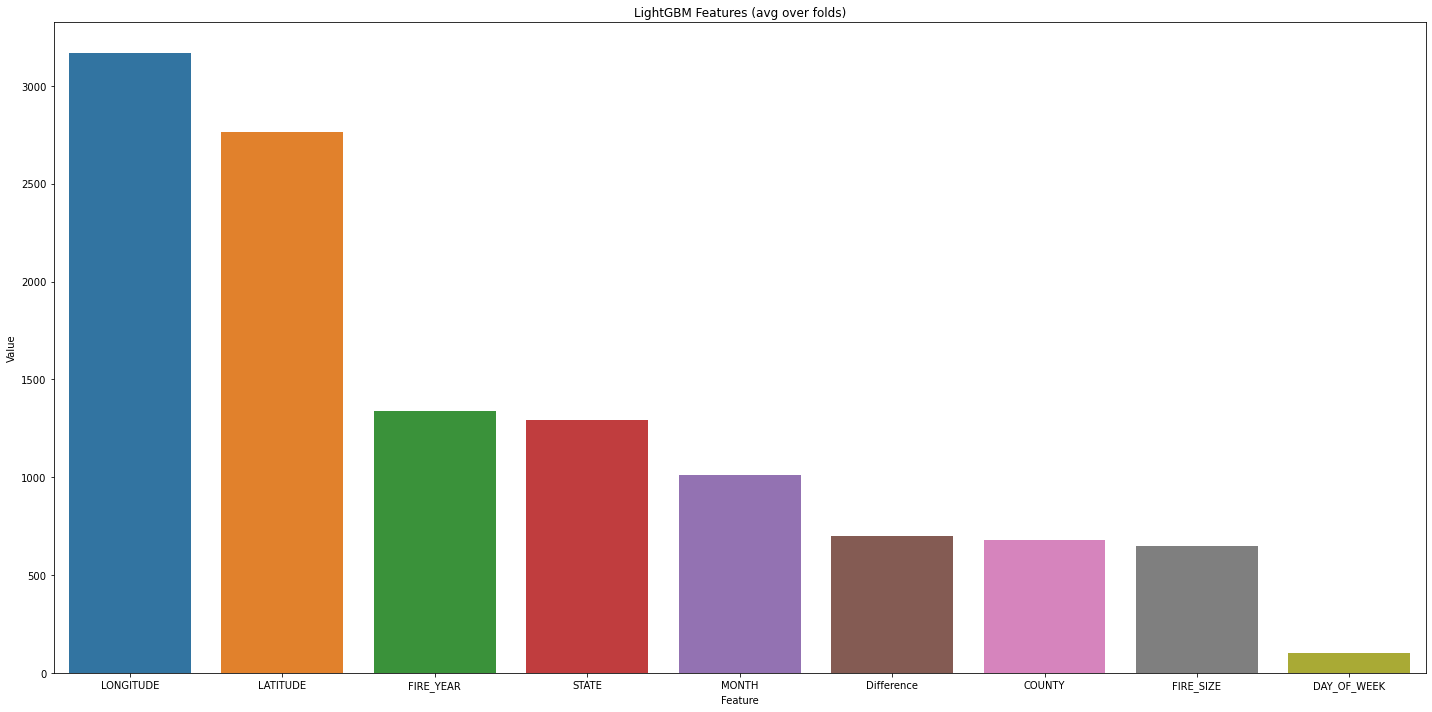

<Figure size 432x288 with 0 Axes>

In [33]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),c.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Feature", y="Value", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-03.png')

## Partial Dependency Plots

In [71]:
import pdpbox
from pdpbox import pdp, info_plots, get_dataset

import partial_dependence as pdp_plot

In [72]:
clf

LGBMClassifier(learning_rate=0.06809001298516983, max_depth=6, num_leaves=40,
               objective='multiclass')

In [59]:
X_train.columns =['FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_SIZE', 'Difference', 'MONTH' , 'DAY_OF_WEEK']

In [75]:
#X_train.columns
features_1 = [ 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_SIZE', 'Difference', 'MONTH' , 'DAY_OF_WEEK']

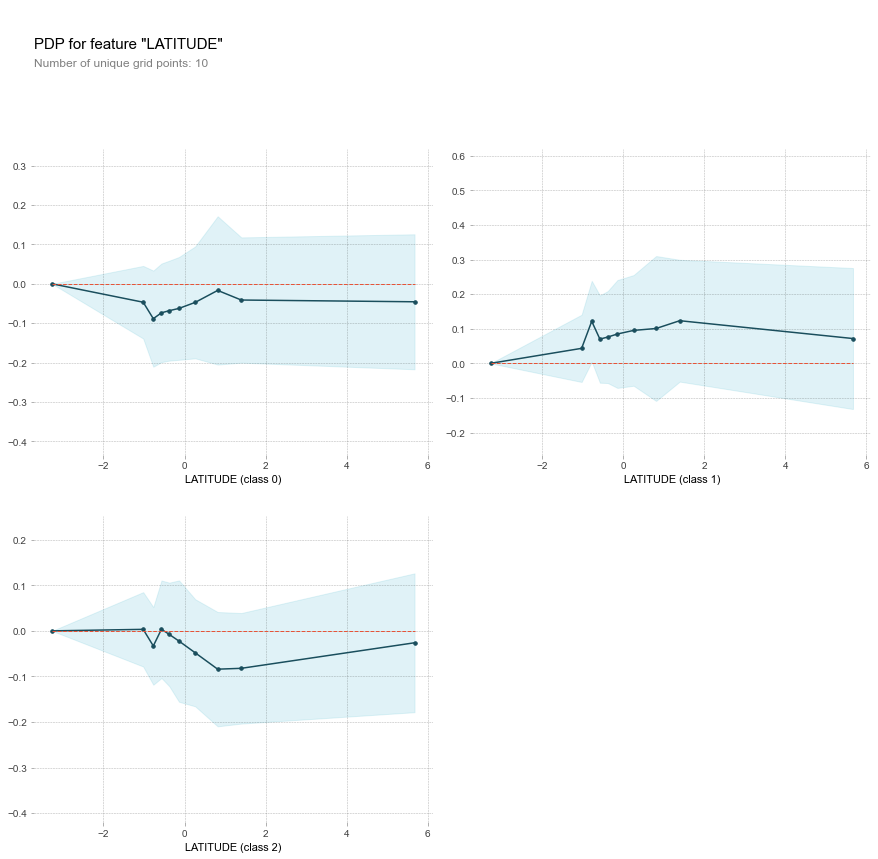

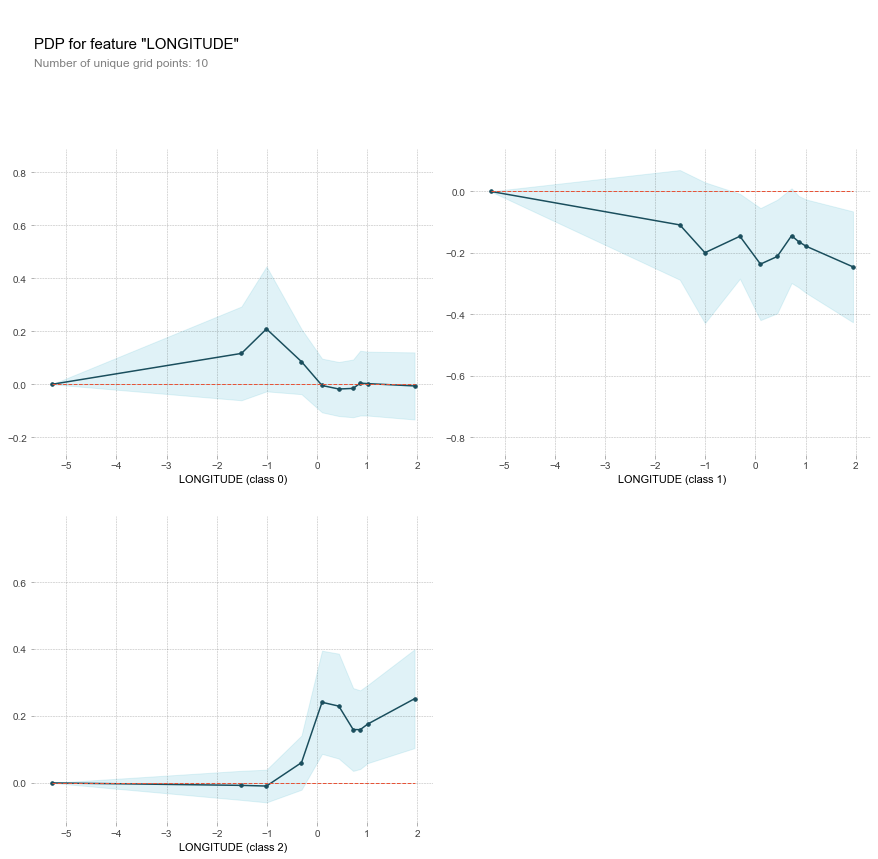

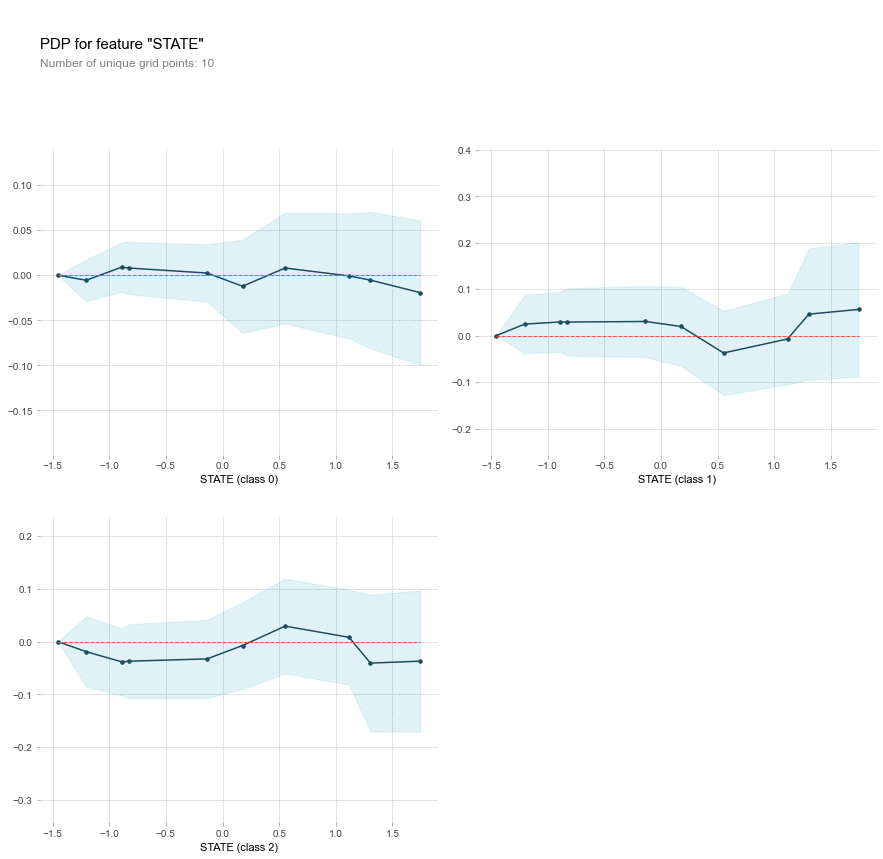

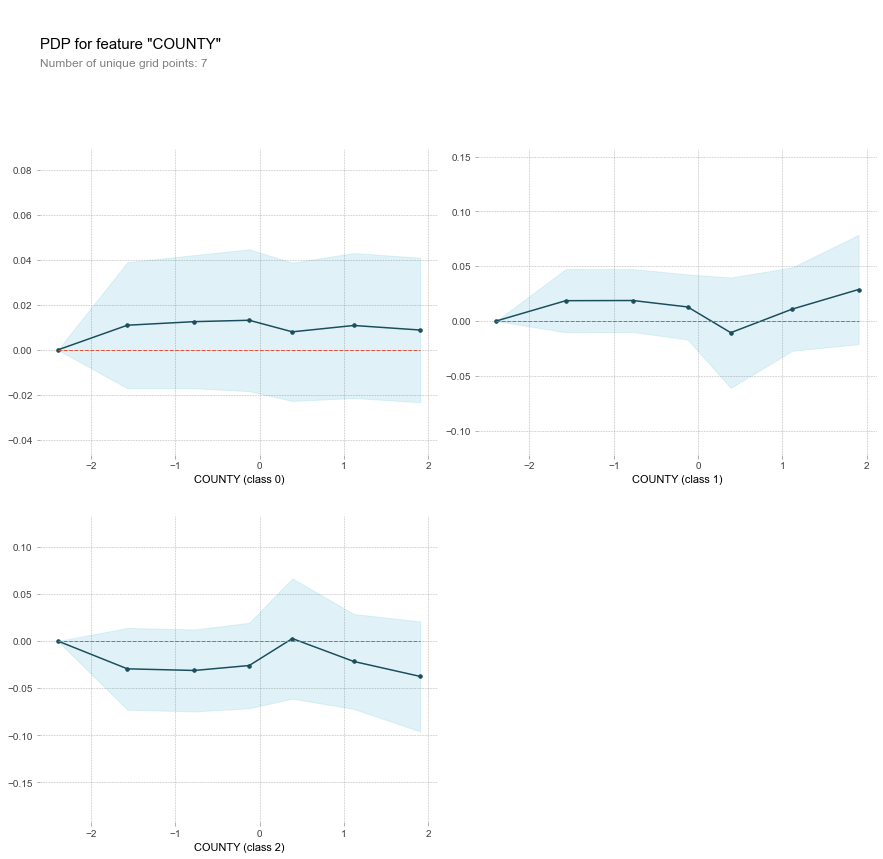

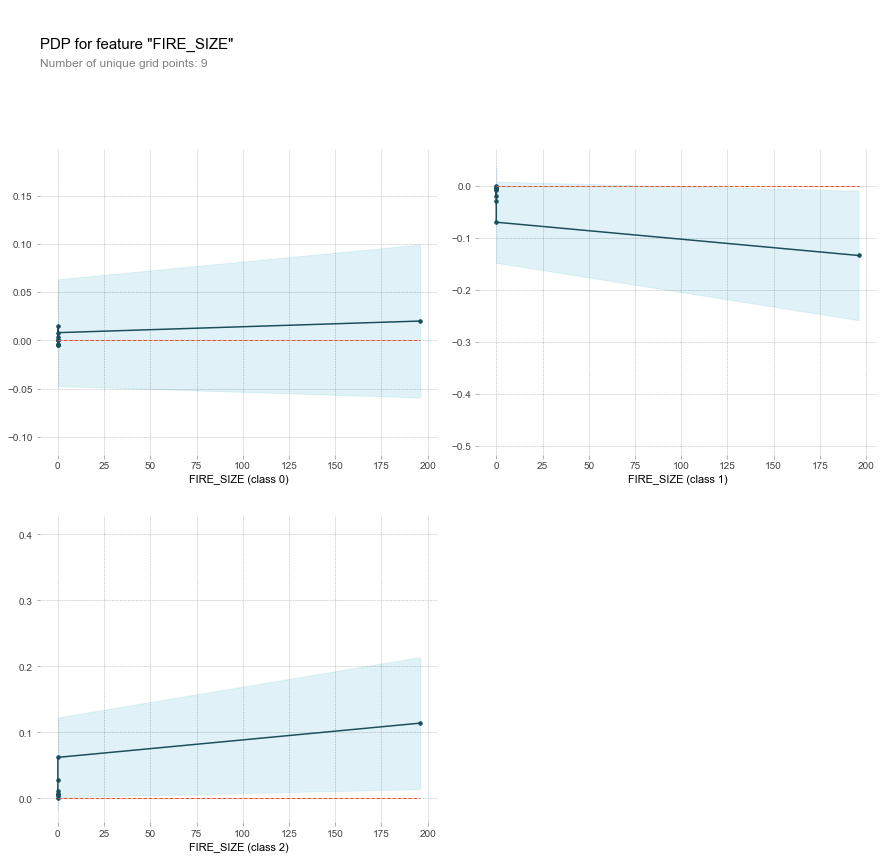

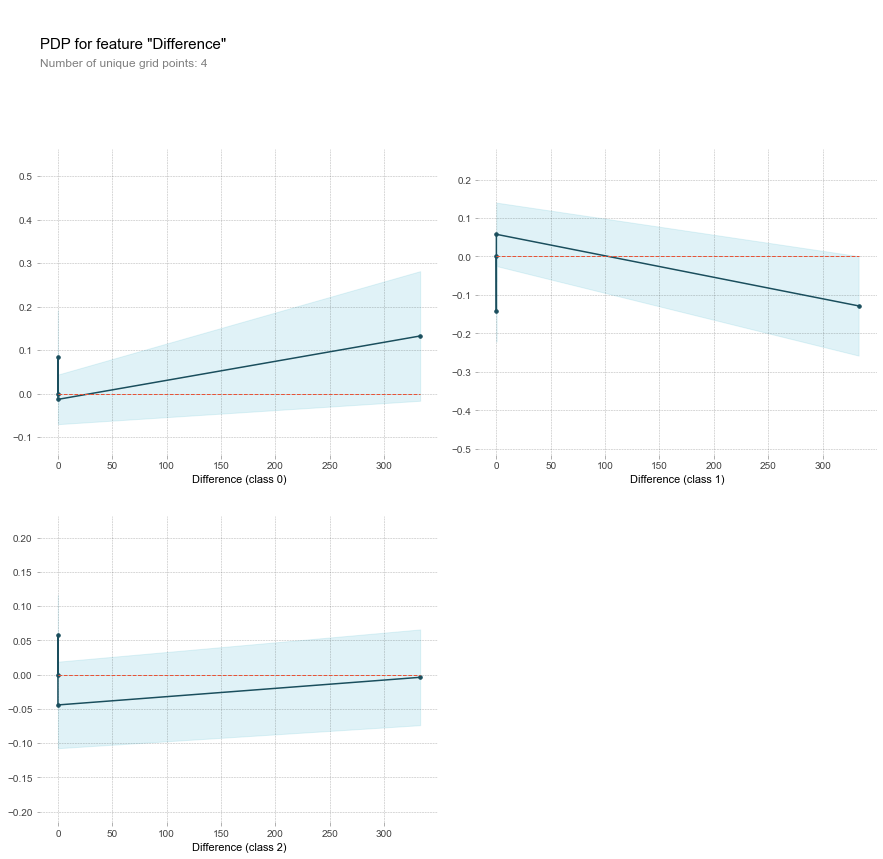

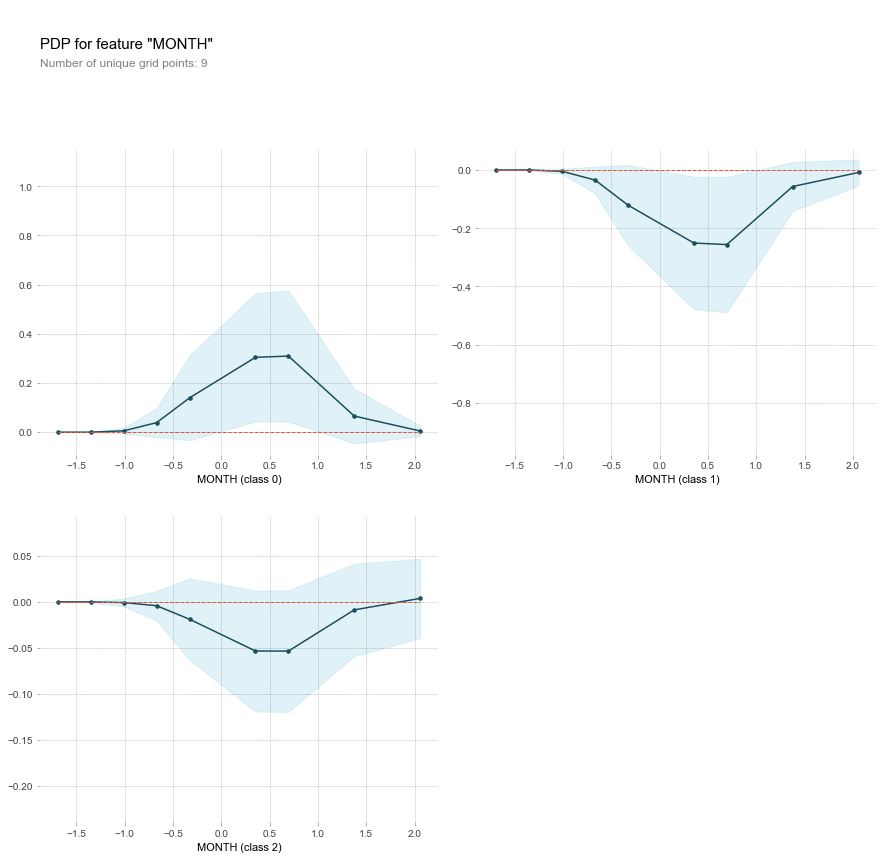

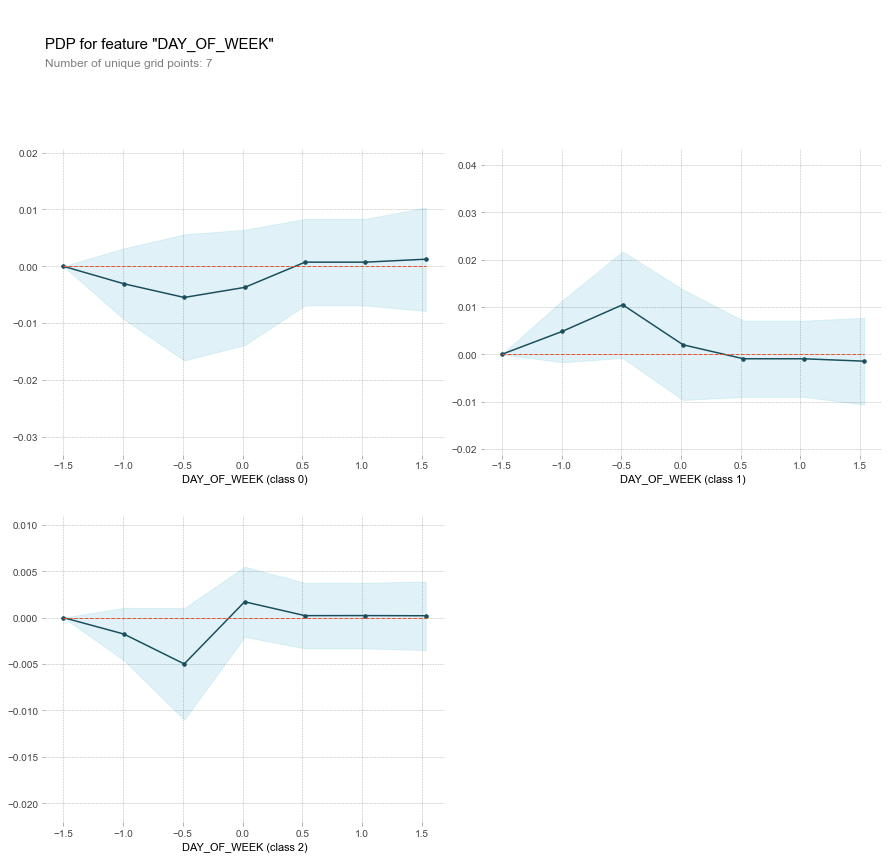

In [79]:
for i in features_1:
    pdp_plot = pdp.pdp_isolate(model=clf, dataset=X_train
                           , model_features=X_train.columns
                           , feature=i)
    pdp.pdp_plot(pdp_plot, i)
    plt.show()
    
  

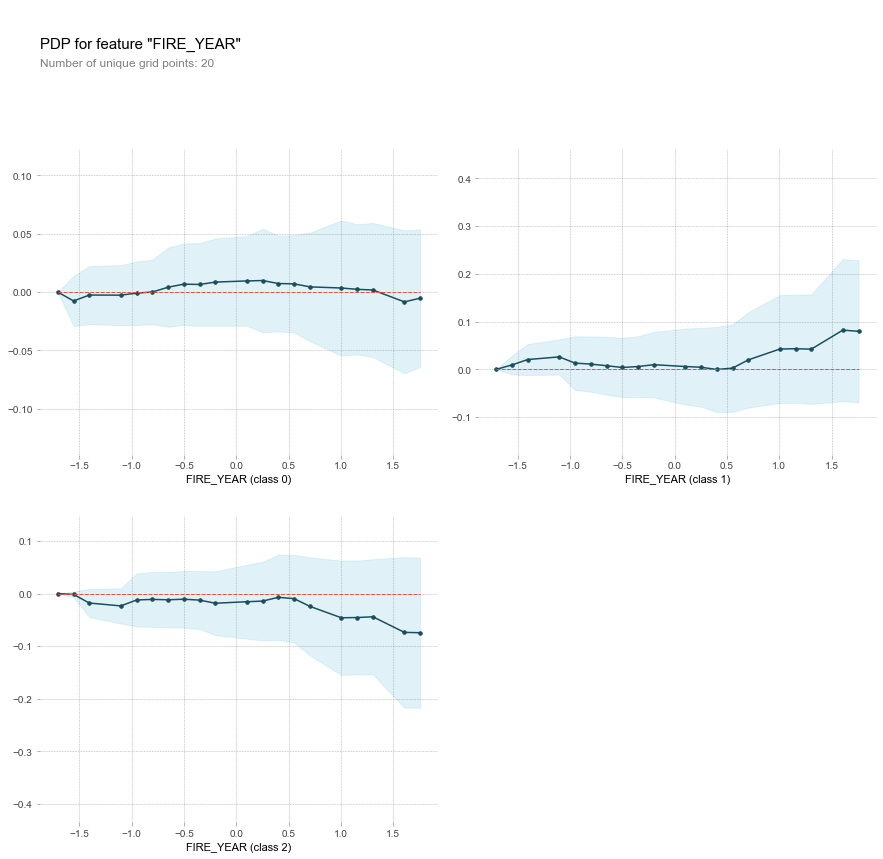

In [74]:
pdp_dist = pdp.pdp_isolate(model=clf, dataset=X_train
                           , model_features=X_train.columns
                           , feature='FIRE_YEAR',num_grid_points=20)
pdp.pdp_plot(pdp_dist, 'FIRE_YEAR');